In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

- 공공데이터 포털(data.go.kr)에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터와 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [4]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
import matplotlib.font_manager as fm
font_file = 'C:/Windows/Fonts/H2MJRE.TTF'
font_name = fm.FontProperties(fname=font_file,size=20).get_name()
plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
#warnings.filterwarnings(action='default')
#warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [7]:
%ls "C:/ai_x/download/shareData/부동산_20250430"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\shareData\부동산_20250430 디렉터리

2025-05-02  오후 06:01    <DIR>          .
2025-05-02  오후 06:01    <DIR>          ..
2025-04-30  오후 02:04           419,340 전국신규아파트분양가격_20241231.csv
2021-01-02  오후 03:44             2,163 전국평균평당분양가2015년8월.csv
               2개 파일             421,503 바이트
               2개 디렉터리  123,890,294,784 바이트 남음


In [11]:
df_first = pd.read_csv('C:/ai_x/download/shareData/부동산_20250430/전국평균평당분양가2015년8월.csv', encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079


In [13]:
df_first.shape

(17, 22)

In [16]:
pd.options.display.max_columns = 22
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [18]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [19]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [21]:
# set_index('열이름') :열을 index로 setting
# reset_index() :index을 열로 setting
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

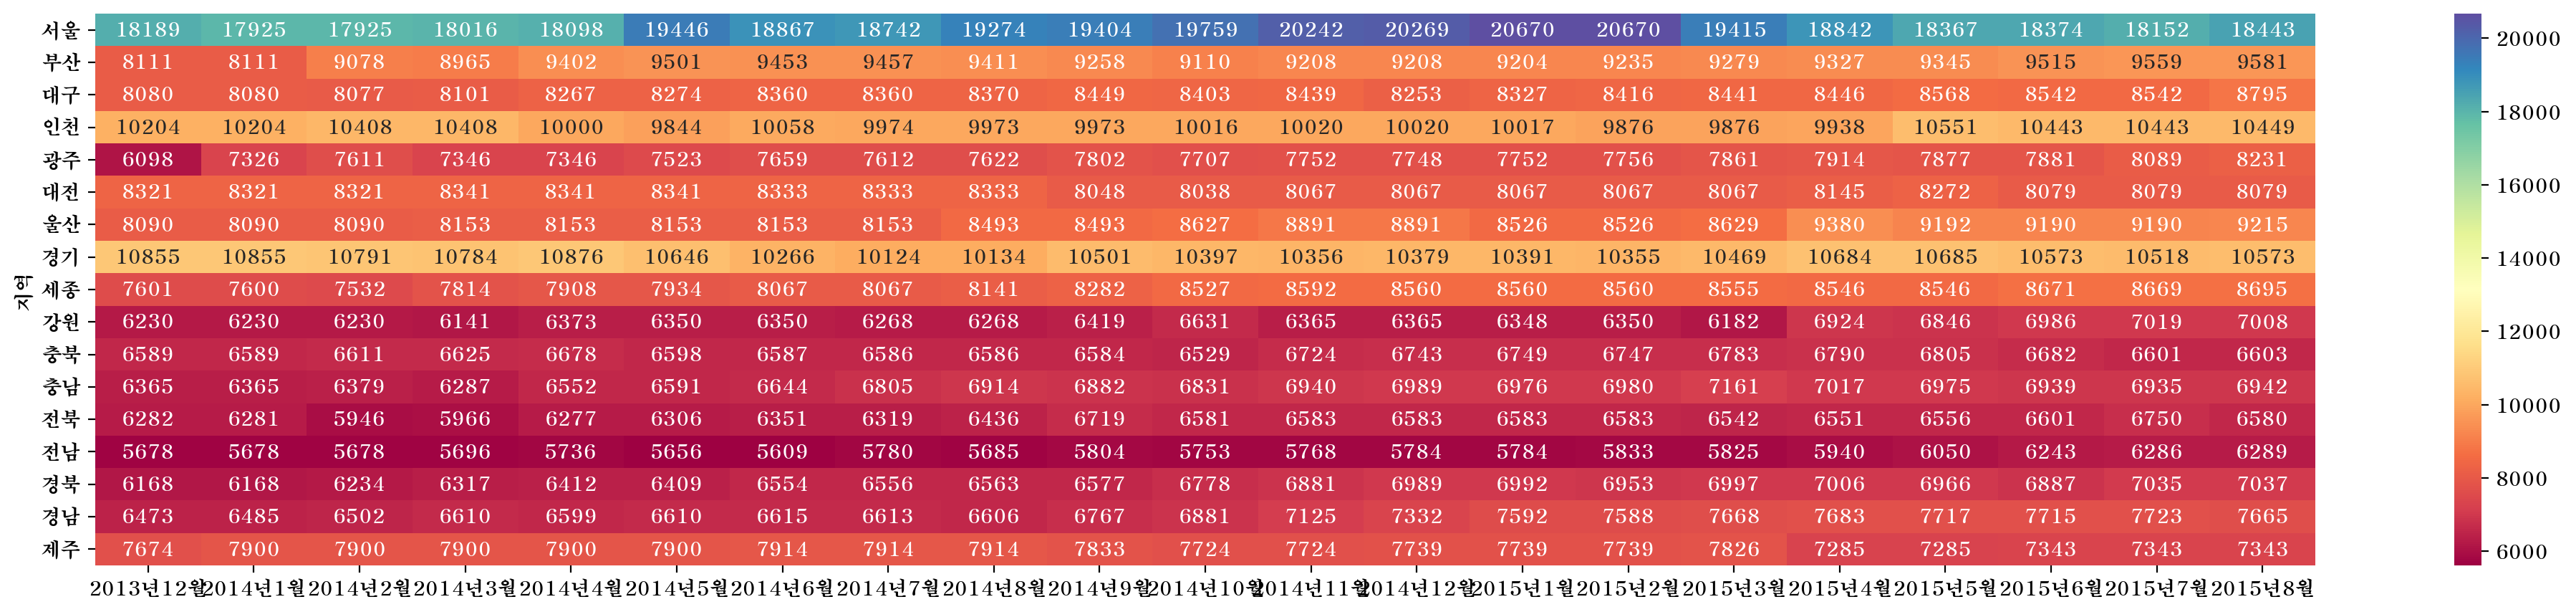

In [91]:
df_first.head()
plt.figure(figsize=(25,5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Spectral', cbar=True)
plt.xticks(rotation=0)
plt.show()

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, ' ', '  ', 8111 -> np.nan, ' ', ' ', 8111, "8,111"

In [69]:
ex = pd.read_csv('C:/ai_x/download/shareData/부동산_20250430/전국신규아파트분양가격_20241231.csv', encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [70]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체 갯수 :', ex.shape[0])
print('결측치 아닌 갯수 :', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 :', ex['분양가격(제곱미터)'].isna().sum())
#ex.isna().sum()

전체 갯수 : 9095
결측치 아닌 갯수 : 8481
결측치 갯수 : 614


In [71]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isnull()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [72]:
type(ex.loc[368, '분양가격(제곱미터)']), type(ex.loc[0, '분양가격(제곱미터)']), 

(float, str)

In [73]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64') # 에러 이유 : '  '
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce').isna().sum()

740

In [74]:
# 분양가격(제곱미터) 컬럼이 space인 행 : 740-614=126개
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,


In [75]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
ex.loc[0] # 분양가격이 정상인 sample

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [76]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    # np.usna(스칼라변수) : 스칼라변수가 결측치(np.nan)인지
    # pd.isna(스칼라변수) : 스칼라변수가 결측치(np.nan, None)인지 여부
    # pd.notnull(스칼라변수) : 결측치 아닌지 여부
    # 1차원이나 2차원 변수.isna() : 결측치 여부
    if pd.notnull(price) and price.strip()!='':
        return len(price)
    else:
        return 0

get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])

(0, 0, 4)

In [77]:
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [78]:
ex.자리수.unique()

array([4, 0, 5], dtype=int64)

In [79]:
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [80]:
ex = ex.reset_index()
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [81]:
# 자리수가 5이면서 idx가 5의 배수인 행
ex[(ex.자리수 == 5) & (ex.idx%5==0)].head(1)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
8245,8245,서울,모든면적,2023,11,10347,5


In [82]:
# 컴마추가 안함 : nanex, spaceex, ex.loc[1]
# 컴파 추가 : ex.loc[0], ex.loc[8245]

In [83]:
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space

In [84]:
# 2022년 데이터 흉내내기 위한 함수  : 매개변수로 row로 받아 nan, ' ', '  ', '5123', '5,123' return
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5==0) & (row.자리수>=4):
        price = price[:-3] + ',' + price[-3:]
    return price

comma_append(nanex), comma_append(spaceex), comma_append(ex.loc[1]),\
comma_append(ex.loc[0]), comma_append(ex.loc[8245])

(nan, '  ', '5652', '5,841', '10,347')

In [85]:
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,"5,841",4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [87]:
ex.tail()

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
9090,9090,제주,모든면적,2024,8,"7,703",4
9091,9091,제주,전용면적 60제곱미터이하,2024,8,NaN,0
9092,9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,4
9093,9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,0
9094,9094,제주,전용면적 102제곱미터초과,2024,8,7950,4


In [89]:
ex.drop(['idx', '자리수'], axis=1, inplace=True)
ex.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
9090,제주,모든면적,2024,8,"7,703"
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950


In [90]:
# 간헐적으로 평당분양가에 ,가 있거나(5개마다) np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/Modified제곱미터분양가격_20241231.csv', 
          # encoding='cp949', 
          index=False)

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [94]:
df_last = pd.read_csv('data/Modified제곱미터분양가격_20241231.csv')
display(df_last.head(1))
print(df_last.shape)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"


(9095, 5)


In [96]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [98]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [97]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [101]:
# df_last['분양가격(제곱미터)'].astype(np.float64)*3.3
# df_last['분양가격(제곱미터)'].str.replace(',','').astype(np.float64)*3.3
# ,와 space때문에 에러
pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce') # 비추

0          NaN
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090       NaN
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply

In [102]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',', '')

'12523'

In [103]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
temp_splited = temp.split(',')
print(temp_splited)
print(''.join(temp_splited))

['12', '523']
12523


In [109]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    # pd.options.mode.copy_on_write = True  # Warning이 있을 경우 실행 옵션
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price): # np.nan이거나 None인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() =='': # space면 np.nan로
        row['제곱미터분양가격'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        # row['분양가격(제곱미터)'] = price.replace(',', '')
        row['제곱미터분양가격'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row
            
    
commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터분양가격                          NaN
Name: 368, dtype: object

In [112]:
%%time
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.tail()

CPU times: total: 1.42 s
Wall time: 1.42 s


,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
9090,제주,모든면적,2024,8,"7,703",7703
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950


In [114]:
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

In [115]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


### map

In [116]:
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
6610,전남,모든면적,2022,3,"3,065"


In [120]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    # if price is np.nan:
    # if np.isnan(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',', ''))
    else:
        return int(price)

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [123]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950.0


In [125]:
df_last.dtypes

지역명            object
규모구분           object
연도              int64
월               int64
분양가격(제곱미터)     object
제곱미터당분양가격     float64
dtype: object

In [126]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0


In [127]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3

In [128]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [129]:
df_last.info() # 497.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [136]:
# 규모구분 칼럼을 중복단어를 제외하고 전용면적 칼럼으로
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                .str.replace('제곱미터','m²')\
                .str.replace('초과','~')\
                .str.replace('이하','').str.replace(' ', '')
df_last['전용면적']

0             모든면적
1             60m²
2        60m²~85m²
3       85m²~102m²
4           102m²~
           ...    
9090          모든면적
9091          60m²
9092     60m²~85m²
9093    85m²~102m²
9094        102m²~
Name: 전용면적, Length: 9095, dtype: object

In [137]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m²' '60m²~85m²' '85m²~102m²' '102m²~']


In [135]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
 7   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 568.6+ KB


# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [138]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터당분양가격   8355 non-null   float64
 6   평당분양가격      8355 non-null   float64
 7   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 568.6+ KB


In [139]:
df_last.drop(['규모구분', '분양가격(제곱미터)', '제곱미터당분양가격'], 
             axis=1,
             inplace=True)

In [140]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [141]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [142]:
df_last = pd.read_csv('data/df_last.csv')
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~


- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()

- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
                    
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [143]:
# 지역명별 데이터 행수 (결측치 포함)를 정렬하여 출력
df_last['지역명'].value_counts()

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [145]:
# 지역명별 데이터 행수(결측치 제외) : 결과가 1차원 시리즈
df_last.groupby('지역명')['평당분양가격'].count().sort_values(ascending=False)

지역명
경기    535
충북    533
부산    533
인천    531
서울    527
강원    523
전북    520
경남    516
충남    516
경북    511
전남    507
대구    495
광주    450
제주    439
대전    415
세종    409
울산    395
Name: 평당분양가격, dtype: int64

In [152]:
# 지영명별 데이터 행수 (결츠치 제외) : 결과가 2차원 시리즈
# df_last.groupby('지역명')['평당분양가격'].count().to_frame()
# df_last.groupby('지역명')[['평당분양가격']].count()
# df_last.groupby('지역명', as_index=False)['평당분양가격'].count() # 지역명이 컬럼
# df_last.groupby('지역명')['평당분양가격'].count().reset_index() # 지역명이 컬럼
df_last.groupby('지역명')['평당분양가격'].count().to_frame().T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


In [154]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~


In [156]:
# pivot_table 이용
df_last.pivot_table(index='지역명',
                   values='평당분양가격',
                   aggfunc='count').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [161]:
# 지역별 평당분양가격 최대값
df_last.groupby('지역명')['평당분양가격'].max().sort_values(ascending=False) #.head(3)

지역명
서울    61917.9
인천    54723.9
부산    31904.4
대전    30851.7
대구    30600.9
울산    27815.7
제주    27753.0
광주    24951.3
경기    24172.5
세종    21087.0
강원    17806.8
경남    16566.0
경북    15345.0
전남    15087.6
충남    14932.5
전북    14774.1
충북    13685.1
Name: 평당분양가격, dtype: float64

In [165]:
# 지역별 평당분양가격 평균 (1차원, 2차원 결과)
df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
df_last.groupby('지역명')[['평당분양가격']].mean().sort_values(by='평당분양가격',
                            ascending=False)

,평당분양가격
지역명,
서울,27755.404554
제주,15912.434624
경기,15420.030280
부산,14896.949156
인천,14513.232203
대구,14434.520000
울산,13958.197975
광주,12998.216000
대전,12829.565060


In [167]:
df_last.groupby('지역명')['평당분양가격'].describe() # 2차원

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,523.0,10078.717400,2828.907867,6639.6,7652.700,9428.10,11873.400,17806.8
경기,535.0,15420.030280,3245.863323,10160.7,13274.250,14652.00,17168.250,24172.5
경남,516.0,10776.955814,2223.562736,7260.0,9187.200,10254.75,12031.800,16566.0
경북,511.0,10261.553425,2276.026239,6949.8,8378.700,9705.30,12500.400,15345.0
광주,450.0,12998.216000,3637.557312,7428.3,9554.325,12673.65,15213.000,24951.3
대구,495.0,14434.520000,3407.303427,8259.9,11949.300,14711.40,16338.300,30600.9
대전,415.0,12829.565060,4191.685609,8002.5,9401.700,11820.60,15310.350,30851.7
부산,533.0,14896.949156,4059.939958,9669.0,12467.400,13411.20,17301.900,31904.4
서울,527.0,27755.404554,6566.391764,16701.3,22497.750,26763.00,31054.650,61917.9


In [171]:
# 지역별 평단분양가의 최대값, 평균값, 통계요약정보를 출력, pivot_table 이용
df_last.pivot_table(index='지역명',
                   values='평당분양가격',
                   aggfunc='max').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1


In [177]:
df_last.pivot_table(index='지역명',
                   values='평당분양가격',
                   aggfunc='mean').applymap(lambda x : round(x,1)).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,10078.7,15420.0,10777.0,10261.6,12998.2,14434.5,12829.6,14896.9,27755.4,10741.8,13958.2,14513.2,9224.3,8886.2,15912.4,9769.5,8896.6


In [176]:
df_last.pivot_table(index='지역명',
                   values='평당분양가격',
                   aggfunc='describe').applymap(lambda x : round(x,1)).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
25%,7652.7,13274.2,9187.2,8378.7,9554.3,11949.3,9401.7,12467.4,22497.8,9101.4,10312.5,11398.2,7613.1,7661.8,10645.8,8141.1,7543.8
50%,9428.1,14652.0,10254.8,9705.3,12673.6,14711.4,11820.6,13411.2,26763.0,10523.7,13827.0,14652.0,8669.1,8679.0,13500.3,9124.5,8596.5
75%,11873.4,17168.2,12031.8,12500.4,15213.0,16338.3,15310.3,17301.9,31054.7,12266.1,17602.2,16214.5,10627.7,9986.6,21908.7,11740.6,9906.6
count,523.0,535.0,516.0,511.0,450.0,495.0,415.0,533.0,527.0,409.0,395.0,531.0,507.0,520.0,439.0,516.0,533.0
max,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1
mean,10078.7,15420.0,10777.0,10261.6,12998.2,14434.5,12829.6,14896.9,27755.4,10741.8,13958.2,14513.2,9224.3,8886.2,15912.4,9769.5,8896.6
min,6639.6,10160.7,7260.0,6949.8,7428.3,8259.9,8002.5,9669.0,16701.3,8487.6,7992.6,9537.0,6289.8,6270.0,7342.5,6926.7,6164.4
std,2828.9,3245.9,2223.6,2276.0,3637.6,3407.3,4191.7,4059.9,6566.4,1638.8,4060.2,3999.9,2092.0,1660.7,6039.0,2000.6,1769.5


## (3) 전용면적별 평당분양가격(평균)

In [178]:
df_last.tail(3)

,지역명,연도,월,평당분양가격,전용면적
9092,제주,2024,8,24799.5,60m²~85m²
9093,제주,2024,8,NaN,85m²~102m²
9094,제주,2024,8,26235.0,102m²~


In [182]:
df_last.groupby('전용면적')[['평당분양가격']].mean().sort_values('평당분양가격').applymap(lambda x : round(x,1))

,평당분양가격
전용면적,
60m²,12522.8
60m²~85m²,12619.0
모든면적,12654.1
85m²~102m²,13447.7
102m²~,14066.8


In [184]:
df_last.pivot_table(index='전용면적',
                   values='평당분양가격',
                   aggfunc='mean').applymap(lambda x : round(x,1)).T

전용면적,102m²~,60m²,60m²~85m²,85m²~102m²,모든면적
평당분양가격,14066.8,12522.8,12619.0,13447.7,12654.1


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [192]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean() #.sort_values('평당분양가격')
print(r)
print(r['서울'])
print(r[('서울','모든면적')])

지역명  전용면적      
강원   102m²~        11314.805607
     60m²           9441.885981
     60m²~85m²      9383.472897
     85m²~102m²    10795.481053
     모든면적           9538.326168
                       ...     
충북   102m²~         9369.532710
     60m²           8598.227103
     60m²~85m²      8558.503738
     85m²~102m²     9418.420000
     모든면적           8547.986916
Name: 평당분양가격, Length: 85, dtype: float64
전용면적
102m²~        29035.948515
60m²          27371.156075
60m²~85m²     26662.612150
85m²~102m²    28972.177143
모든면적          26829.678505
Name: 평당분양가격, dtype: float64
26829.6785046729


In [195]:
r = df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean()
r

지역명               강원                                                       \
전용면적          102m²~         60m²    60m²~85m²    85m²~102m²         모든면적   
평당분양가격  11314.805607  9441.885981  9383.472897  10795.481053  9538.326168   

지역명               경기                                                          \
전용면적          102m²~          60m²     60m²~85m²    85m²~102m²          모든면적   
평당분양가격  16559.091589  15291.151402  14787.207477  15739.920561  14722.780374   

지역명            경남  ...            제주            충남                            \
전용면적       102m²~  ...          모든면적        102m²~         60m²    60m²~85m²   
평당분양가격  11522.478  ...  16338.885981  10379.433333  9231.086916  9418.292523   

지역명                                     충북                            \
전용면적   85m²~102m²         모든면적      102m²~         60m²    60m²~85m²   
평당분양가격  10818.775  9153.583178  9369.53271  8598.227103  8558.503738   

지역명                             
전용면적   85m²~102m²         모든면적  
평당분양가격    9418.42  8547.986916  

[1 rows x 85 columns]

In [198]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()
# 2차원 index중 level0 인덱스는 그대로, level1인덱스를 컬럼으로 올리면
r.unstack().round()

전용면적,102m²~,60m²,60m²~85m²,85m²~102m²,모든면적
지역명,,,,,
강원,11315.0,9442.0,9383.0,10795.0,9538.0
경기,16559.0,15291.0,14787.0,15740.0,14723.0
경남,11522.0,10122.0,10108.0,12151.0,10147.0
경북,11061.0,9732.0,9828.0,10968.0,9857.0
광주,14749.0,12254.0,12656.0,12292.0,12798.0
대구,15564.0,13748.0,14494.0,13714.0,14517.0
대전,17662.0,11834.0,11920.0,13003.0,11948.0
부산,15741.0,14449.0,14745.0,14801.0,14765.0
서울,29036.0,27371.0,26663.0,28972.0,26830.0


In [201]:
df_last.pivot_table(index=['지역명','전용면적'],
                   values='평당분양가격',
                   aggfunc='mean').unstack().round()

평당분양가격                                       
전용면적   102m²~     60m² 60m²~85m² 85m²~102m²     모든면적
지역명                                                 
강원    11315.0   9442.0    9383.0    10795.0   9538.0
경기    16559.0  15291.0   14787.0    15740.0  14723.0
경남    11522.0  10122.0   10108.0    12151.0  10147.0
경북    11061.0   9732.0    9828.0    10968.0   9857.0
광주    14749.0  12254.0   12656.0    12292.0  12798.0
대구    15564.0  13748.0   14494.0    13714.0  14517.0
대전    17662.0  11834.0   11920.0    13003.0  11948.0
부산    15741.0  14449.0   14745.0    14801.0  14765.0
서울    29036.0  27371.0   26663.0    28972.0  26830.0
세종    10685.0  10776.0   10775.0    10600.0  10841.0
울산    14809.0  13624.0   13520.0    15304.0  13471.0
인천    16267.0  13847.0   13879.0    14742.0  13897.0
전남    10207.0   9105.0    8928.0     8808.0   8971.0
전북     9448.0   8531.0    8624.0     9170.0   8662.0
제주    16771.0  14971.0   16071.0    14679.0  16339.0
충남    10379.0   9231.0    9418.0    10819.0   9154.0
충북     9370.0   8598.0    8559.0     9418.0   8548.0

In [207]:
r = df_last.pivot_table(index='지역명',
                    columns='전용면적',
                    values='평당분양가격',
                    aggfunc='mean').round()
r=r[['60m²','60m²~85m²','85m²~102m²','102m²~','모든면적']]
r

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9442.0,9383.0,10795.0,11315.0,9538.0
경기,15291.0,14787.0,15740.0,16559.0,14723.0
경남,10122.0,10108.0,12151.0,11522.0,10147.0
경북,9732.0,9828.0,10968.0,11061.0,9857.0
광주,12254.0,12656.0,12292.0,14749.0,12798.0
대구,13748.0,14494.0,13714.0,15564.0,14517.0
대전,11834.0,11920.0,13003.0,17662.0,11948.0
부산,14449.0,14745.0,14801.0,15741.0,14765.0
서울,27371.0,26663.0,28972.0,29036.0,26830.0


<Axes: xlabel='전용면적', ylabel='지역명'>

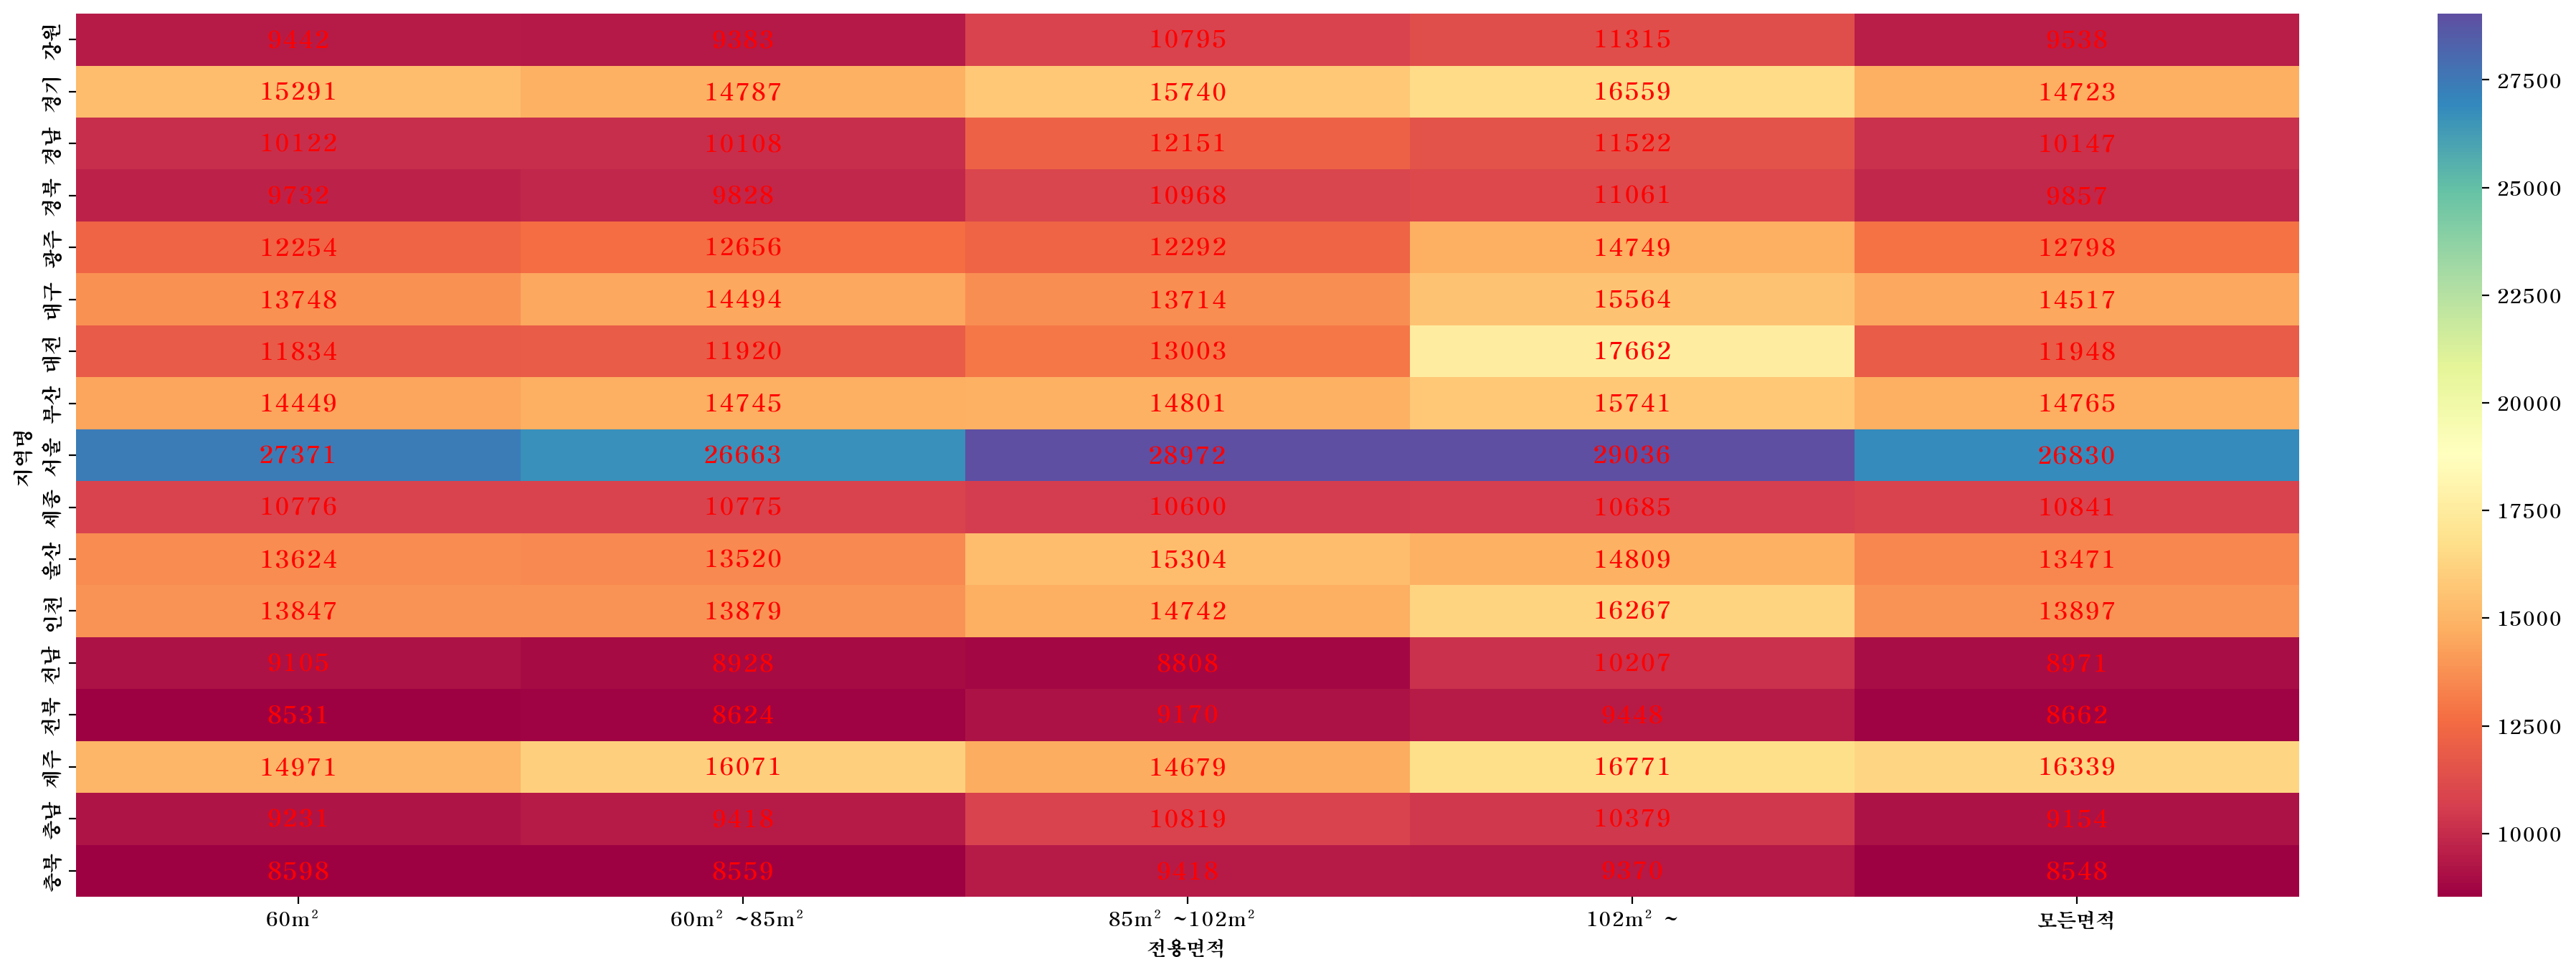

In [210]:
plt.figure(figsize=(25,8))
sns.heatmap(r, cmap='Spectral', annot=True, fmt='.0f',
           annot_kws={'size':12, 'weight':'bold', 'color':'red'})

## (5) 연도, 지역별 평당분양가격(평균)

In [213]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round().T

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역명,,,,,,,,,,
강원,7188.0,7163.0,7319.0,8219.0,8934.0,10302.0,10291.0,11644.0,13409.0,15622.0
경기,11061.0,11685.0,12296.0,14258.0,15666.0,15106.0,14567.0,16622.0,20175.0,21532.0
경남,8459.0,8497.0,8807.0,9328.0,10698.0,10919.0,11302.0,12456.0,13283.0,13777.0
경북,7464.0,7753.0,8288.0,8681.0,9050.0,9998.0,11227.0,12018.0,13025.0,14085.0
광주,7917.0,9191.0,9600.0,9527.0,12112.0,13406.0,13710.0,15096.0,17958.0,18548.0
대구,9019.0,10282.0,12192.0,12139.0,14082.0,15314.0,15586.0,16822.0,17657.0,24102.0
대전,8191.0,8911.0,9913.0,10234.0,12619.0,11239.0,11994.0,14114.0,17917.0,19882.0
부산,10377.0,10744.0,11638.0,12890.0,13538.0,13353.0,14318.0,18167.0,20471.0,22900.0
서울,20316.0,21753.0,21864.0,23202.0,28287.0,29781.0,29380.0,29129.0,33231.0,38982.0


In [224]:
r = df_last.pivot_table(index='연도',
                   columns='지역명',
                   values='평당분양가격').round().T
r

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역명,,,,,,,,,,
강원,7188.0,7163.0,7319.0,8219.0,8934.0,10302.0,10291.0,11644.0,13409.0,15622.0
경기,11061.0,11685.0,12296.0,14258.0,15666.0,15106.0,14567.0,16622.0,20175.0,21532.0
경남,8459.0,8497.0,8807.0,9328.0,10698.0,10919.0,11302.0,12456.0,13283.0,13777.0
경북,7464.0,7753.0,8288.0,8681.0,9050.0,9998.0,11227.0,12018.0,13025.0,14085.0
광주,7917.0,9191.0,9600.0,9527.0,12112.0,13406.0,13710.0,15096.0,17958.0,18548.0
대구,9019.0,10282.0,12192.0,12139.0,14082.0,15314.0,15586.0,16822.0,17657.0,24102.0
대전,8191.0,8911.0,9913.0,10234.0,12619.0,11239.0,11994.0,14114.0,17917.0,19882.0
부산,10377.0,10744.0,11638.0,12890.0,13538.0,13353.0,14318.0,18167.0,20471.0,22900.0
서울,20316.0,21753.0,21864.0,23202.0,28287.0,29781.0,29380.0,29129.0,33231.0,38982.0


<Axes: xlabel='지역명', ylabel='연도'>

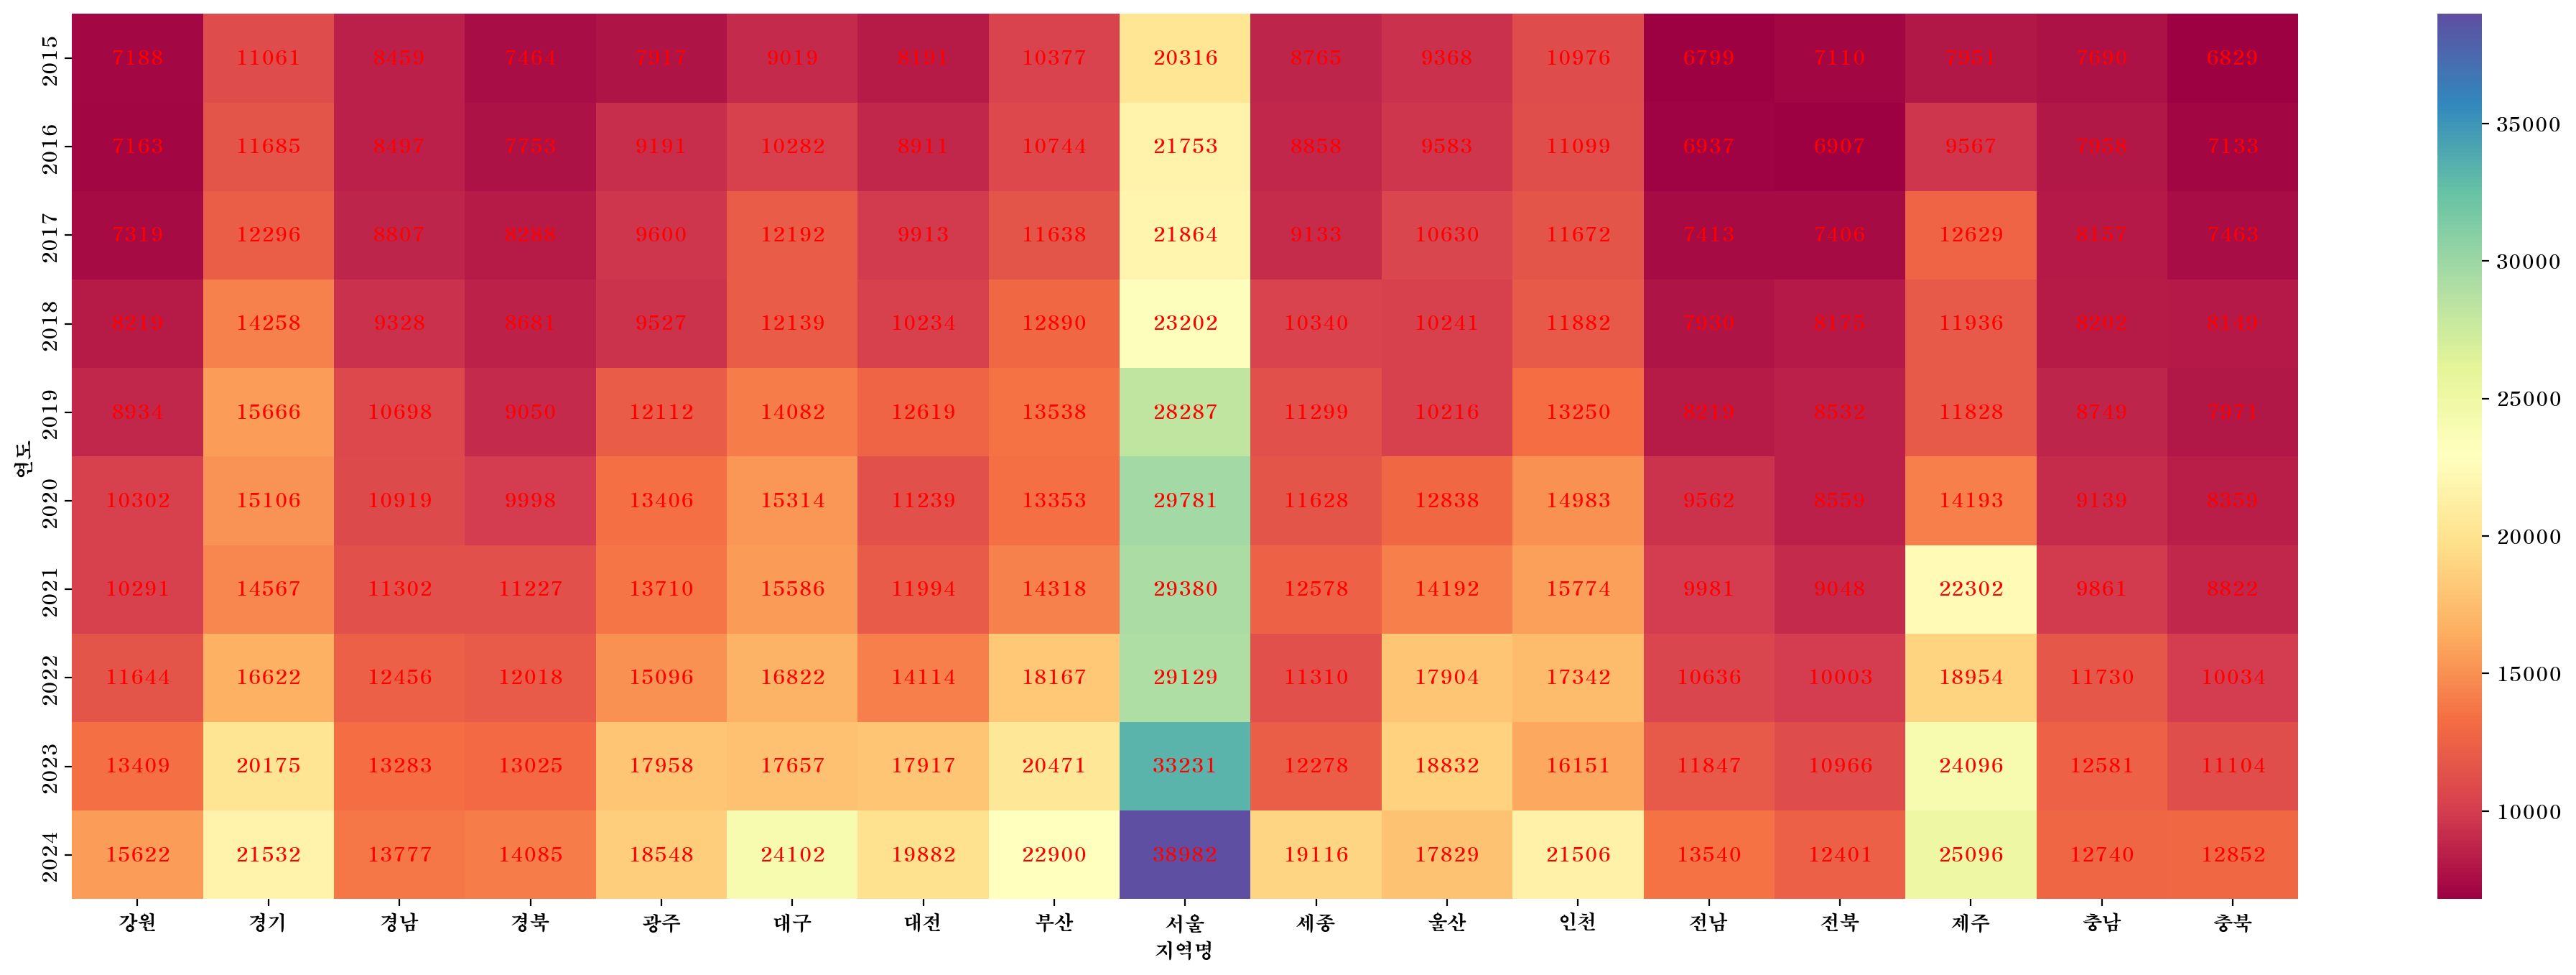

In [220]:
plt.figure(figsize=(25,8))
sns.heatmap(r.T, cmap='Spectral', annot=True, fmt='.0f',
           annot_kws={'size':10, 'weight':'bold', 'color':'red'}, # cbar=False
           )

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/ 동일한 통계, 다른 분포


## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [233]:
result

지역명
울산    395
세종    409
대전    415
제주    439
광주    450
대구    495
전남    507
경북    511
경남    516
충남    516
전북    520
강원    523
서울    527
인천    531
부산    533
충북    533
경기    535
Name: 평당분양가격, dtype: int64

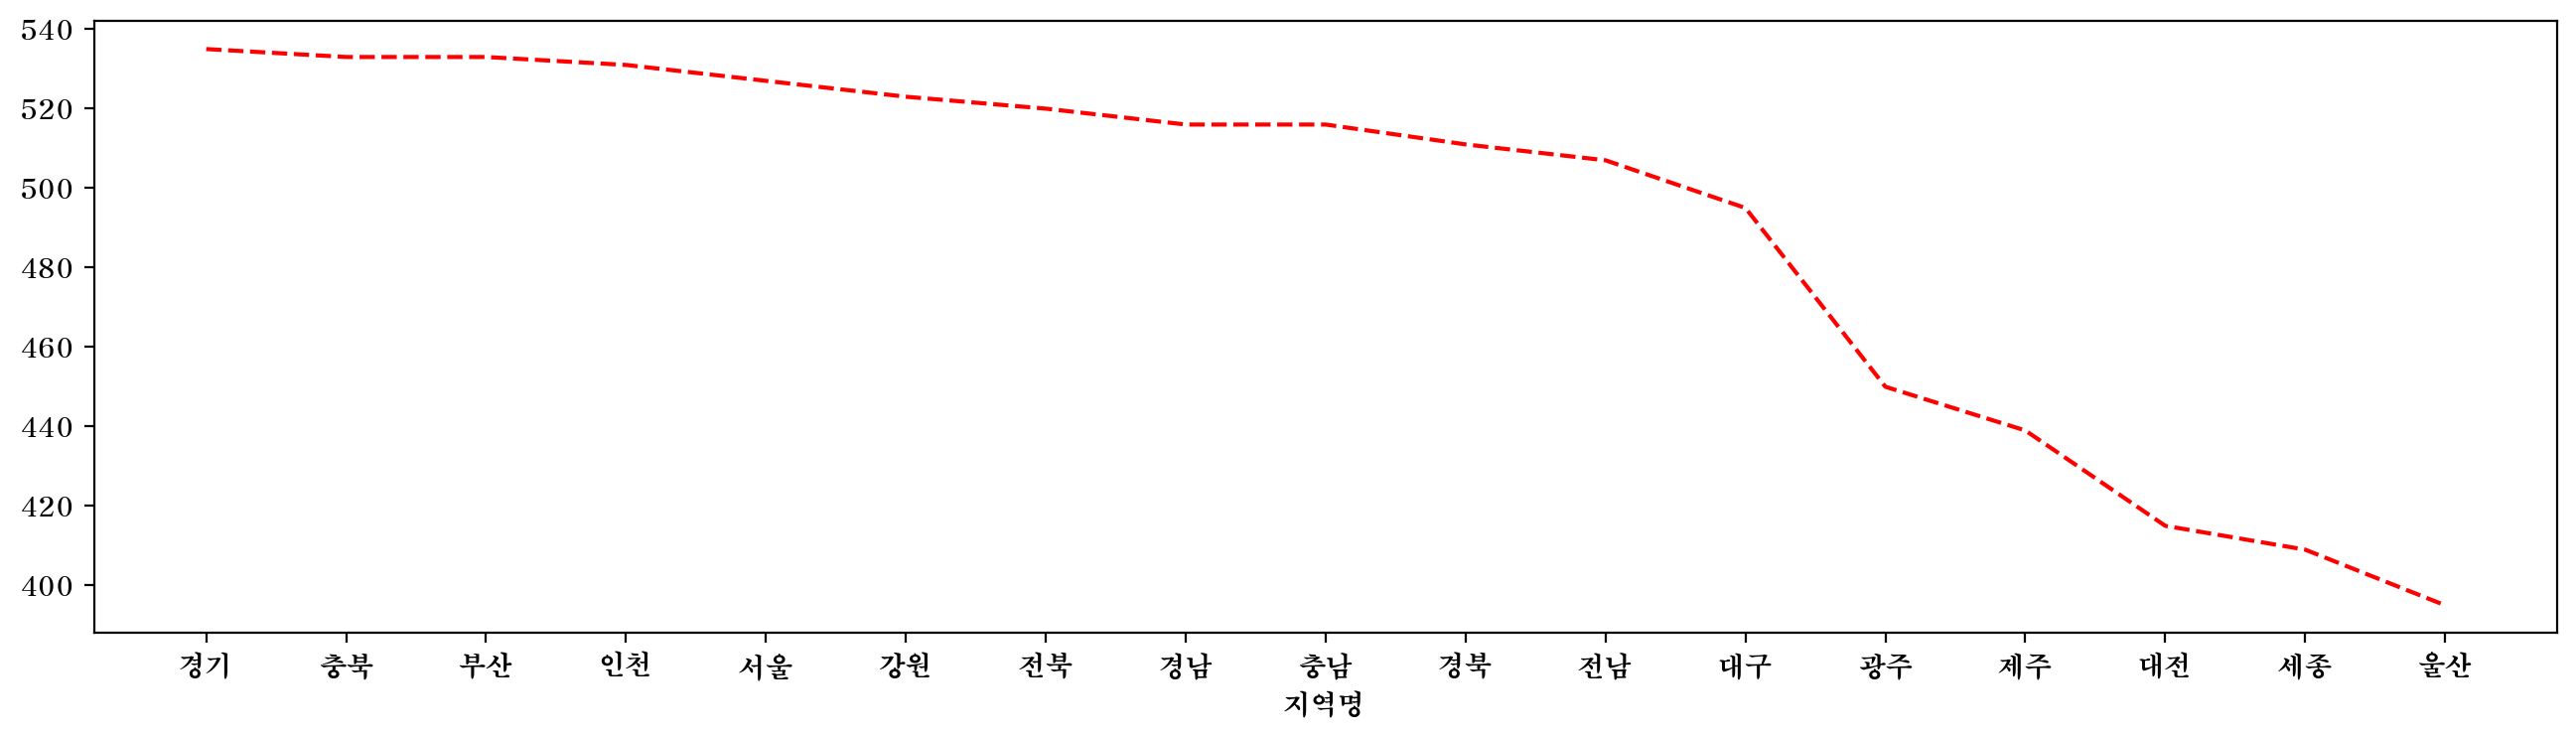

In [240]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values(ascending=False)
plt.figure()
#result.plot(kind='bar')
ax = result.plot.line(figsize=(16,4), color='r', linestyle='--')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

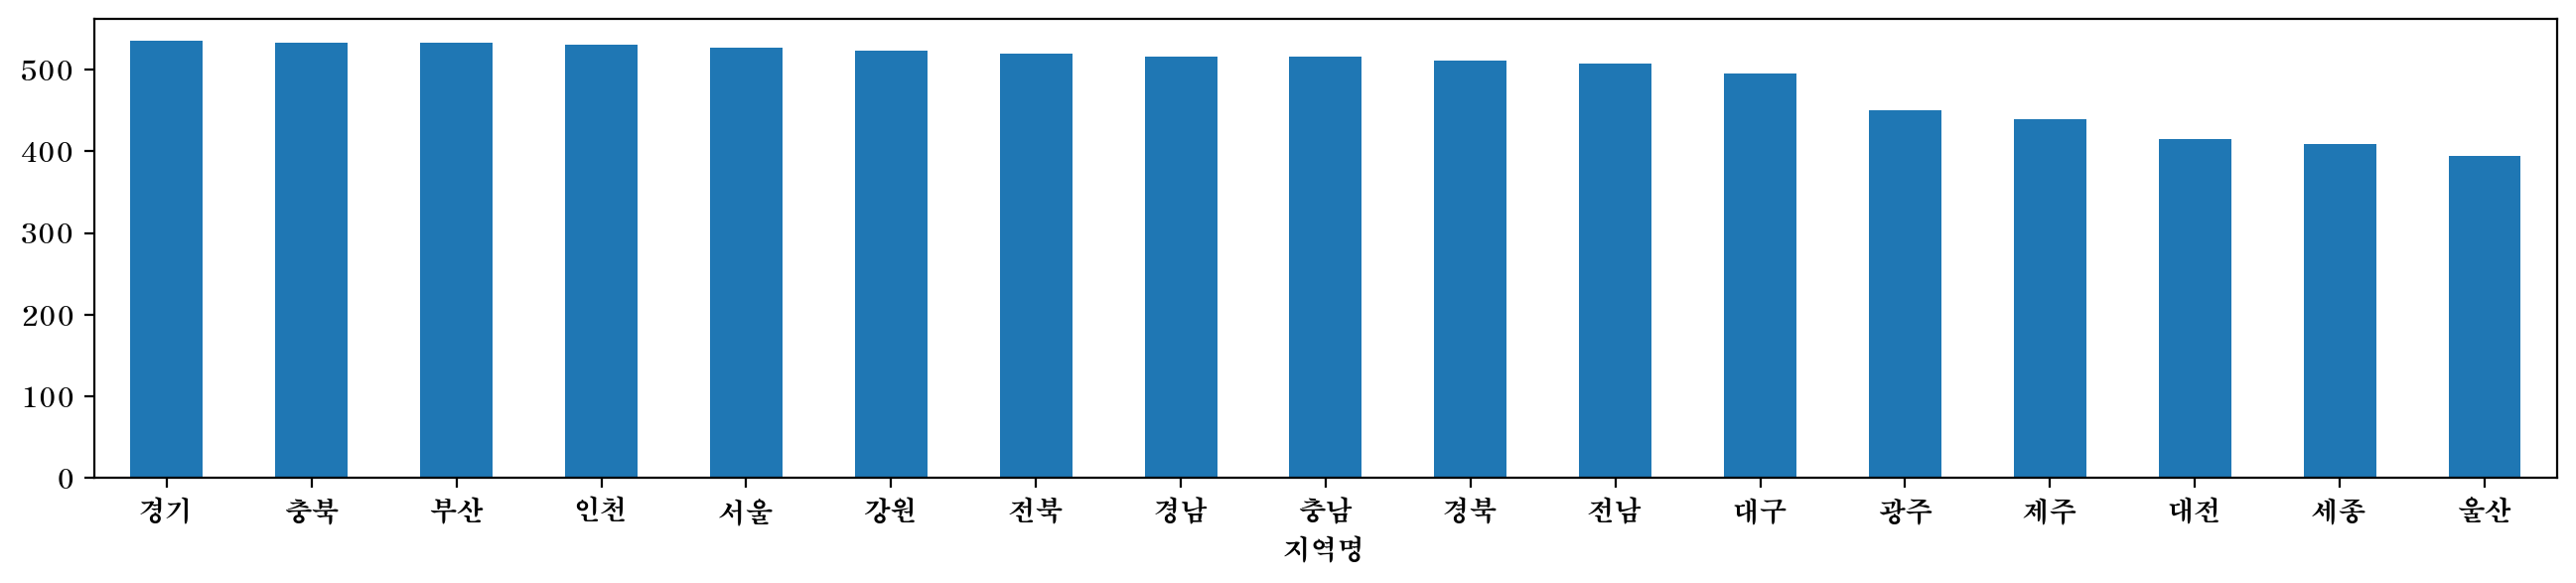

In [243]:
result.plot.bar()
result.plot(kind='bar', figsize=(16,3), rot=0)
plt.show()

## (2) 지역별 평당분양가격 (line, bar)

<Axes: xlabel='지역명'>

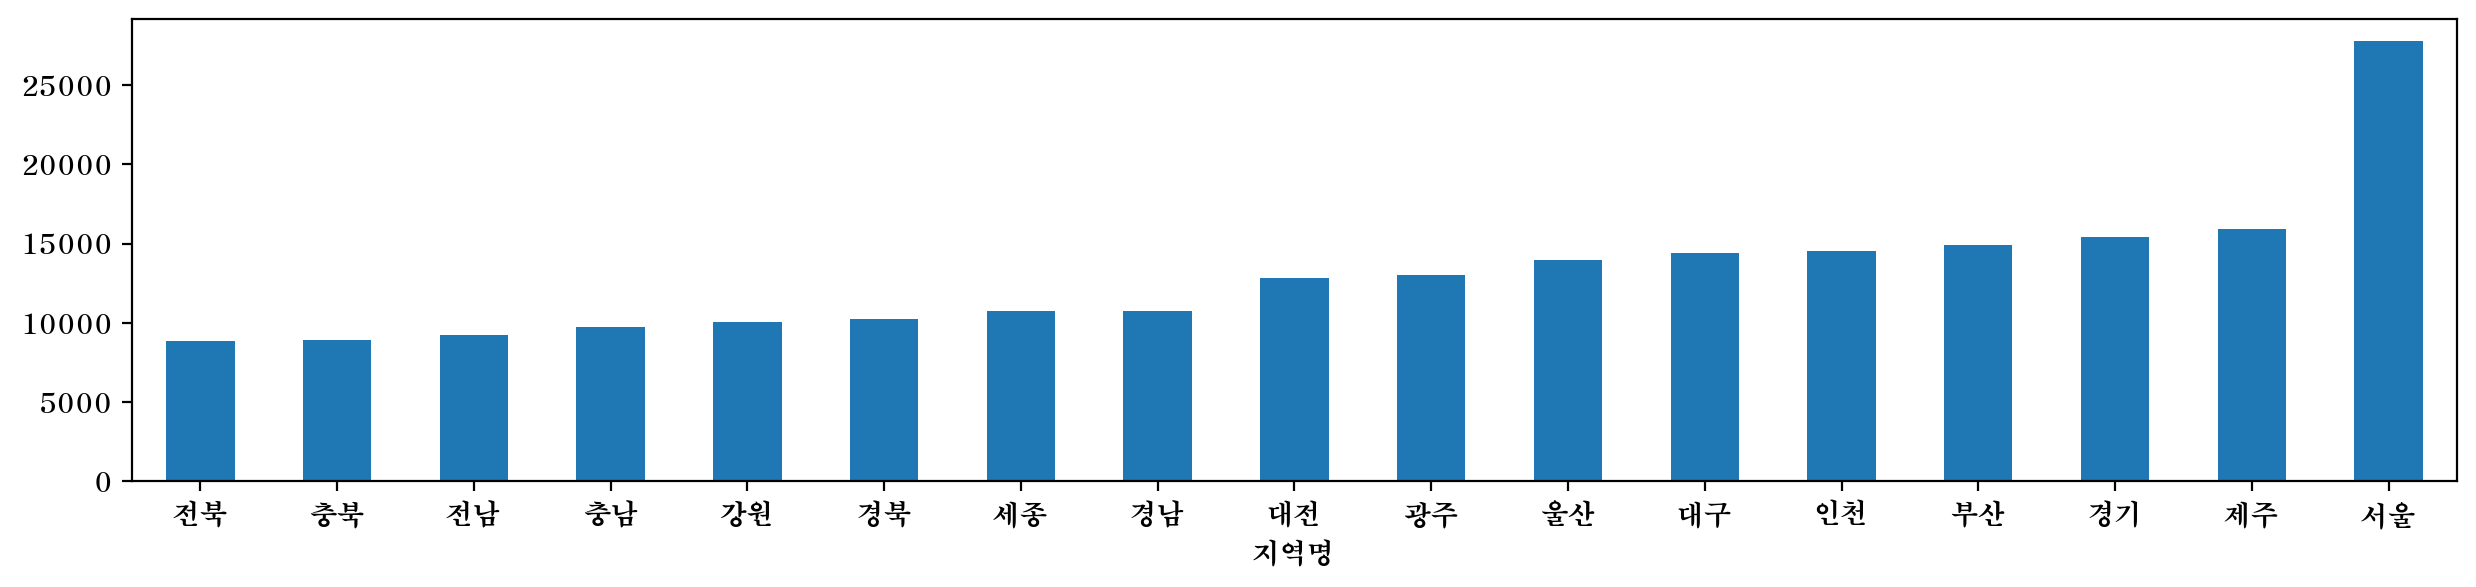

In [245]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(
                                kind='bar', figsize=(15,3), rot=0)

## (3) 전용면적별 평당분양가격(barplot)

In [250]:
result = df_last.groupby('전용면적')['평당분양가격'].mean().sort_values(ascending=True)
result

전용면적
60m²          12522.774427
60m²~85m²     12619.048827
모든면적          12654.068098
85m²~102m²    13447.672835
102m²~        14066.826846
Name: 평당분양가격, dtype: float64

In [262]:
for idx, val in enumerate(result):
    print(idx, val)

0 12522.77442680776
1 12619.048826815642
2 12654.06809815951
3 13447.67283519553
4 14066.826845637583


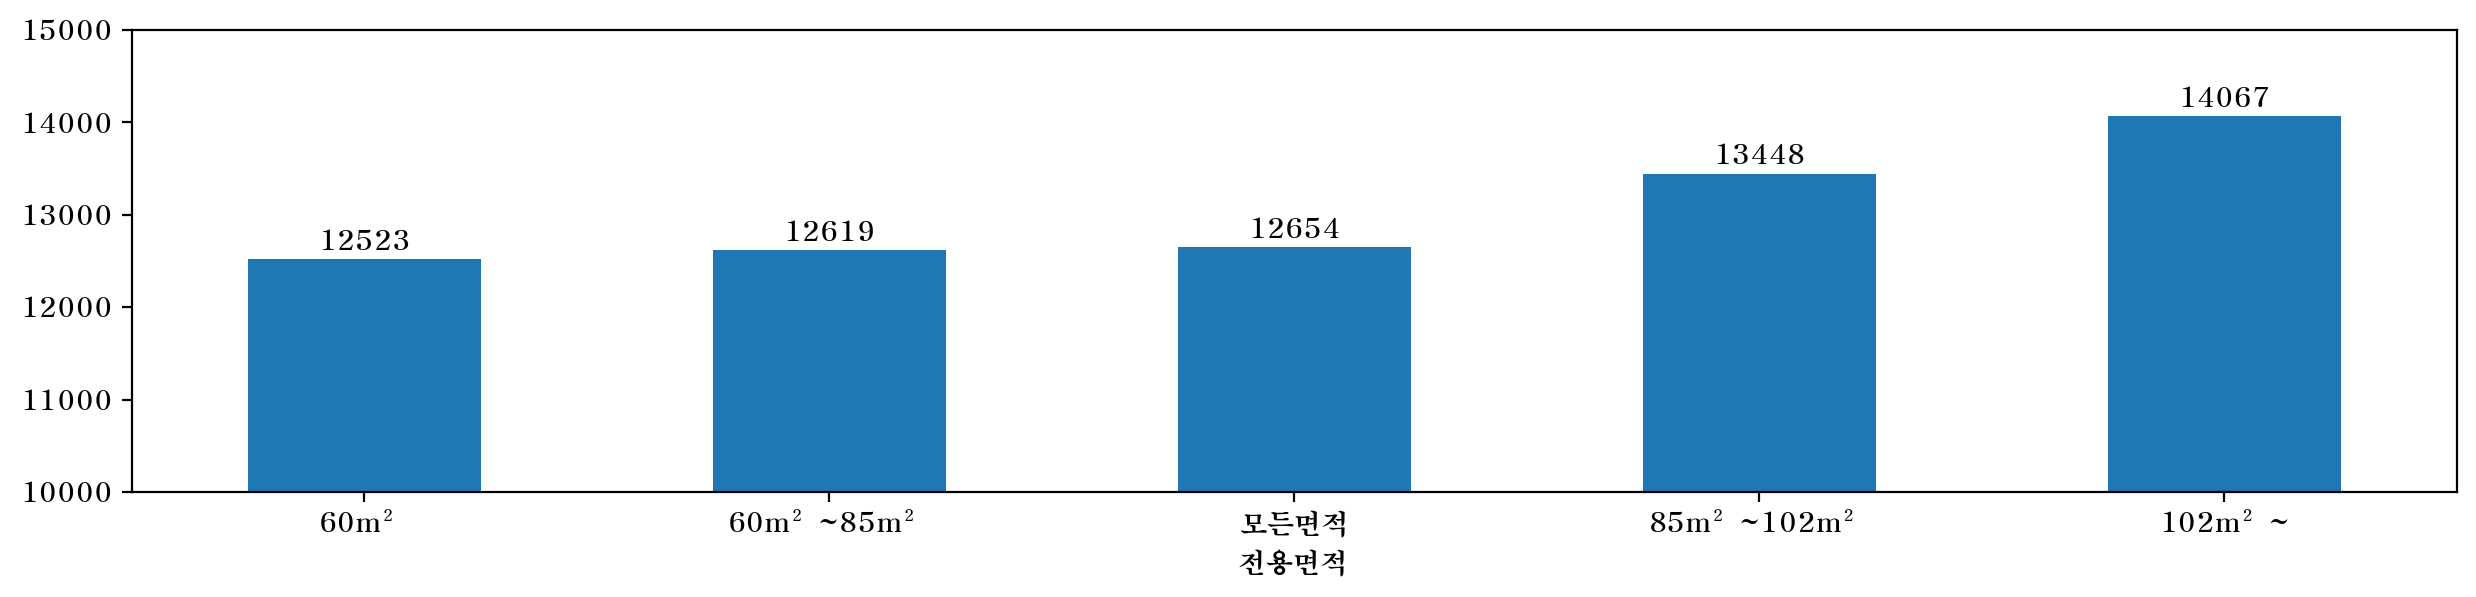

In [263]:
ax = result.plot(kind='bar', rot=0, figsize=(15,3))
ax.set_ylim([10000,15000])
for idx, val in enumerate(result):
    ax.text(idx-0.1,val+100, round(val))

In [266]:
result = df_last.groupby('연도')['평당분양가격'].mean()
result

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64

## (4) 연도별 평균 평당분양가격(line)

In [267]:
for year, val in result.items():
    print(year, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105265
2020 13039.42244897959
2021 13636.02253968254
2022 14942.504494382023
2023 16890.92065677966
2024 18962.919230769232


In [268]:
for year, val in zip(result.index, result):
    print(year, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105265
2020 13039.42244897959
2021 13636.02253968254
2022 14942.504494382023
2023 16890.92065677966
2024 18962.919230769232


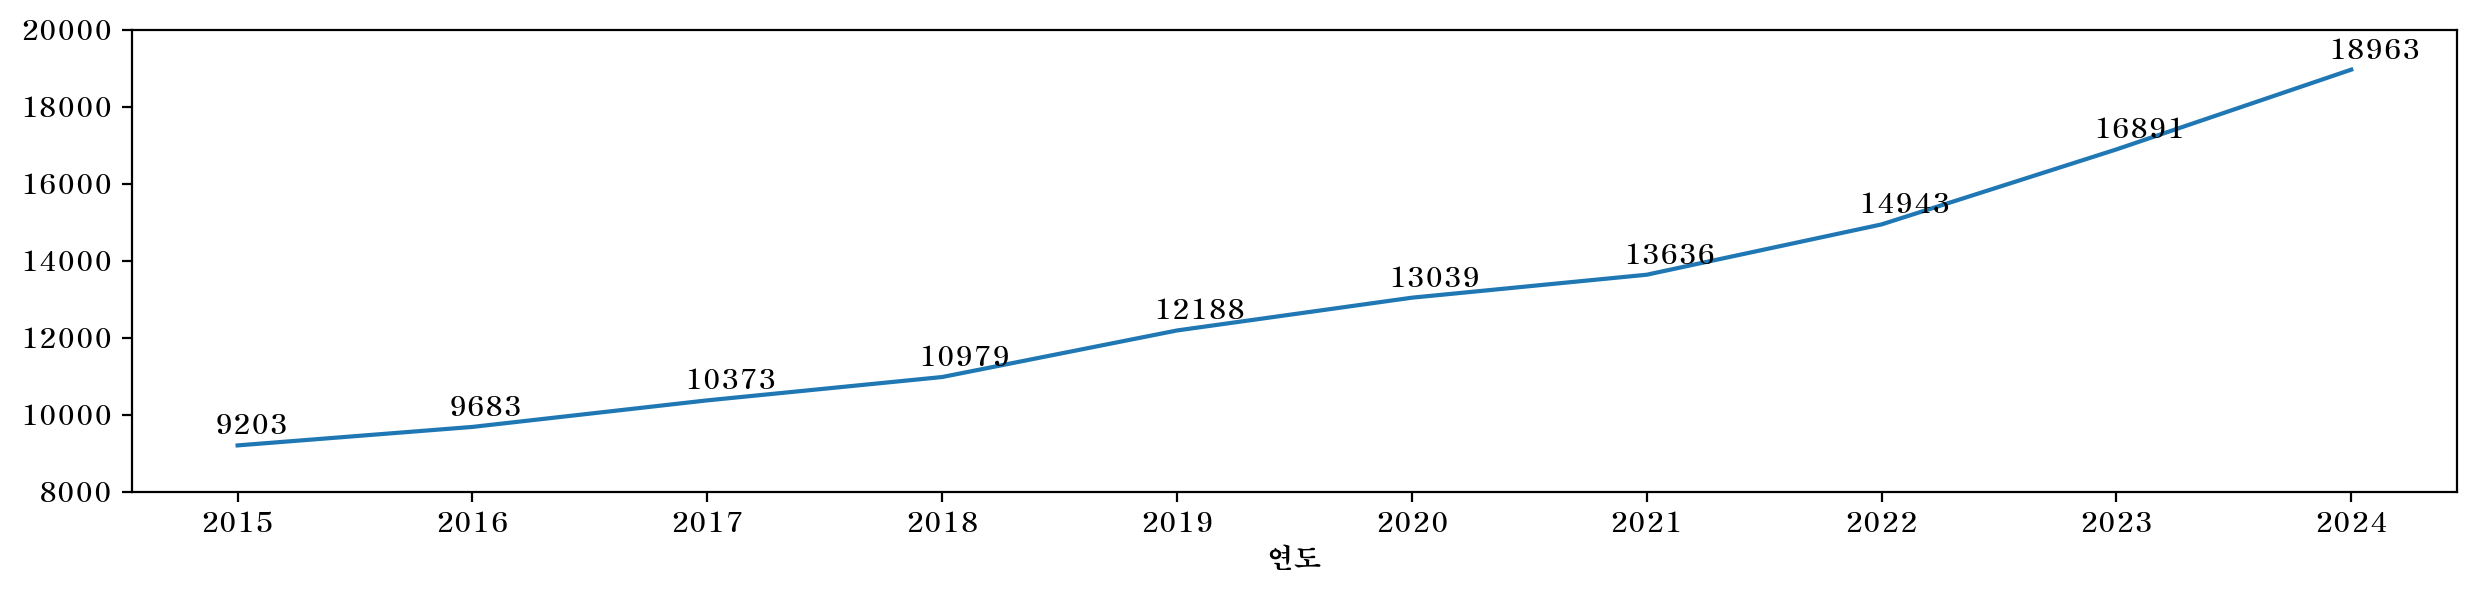

In [274]:
result.plot(kind='line', figsize=(15,3))
plt.ylim([8000, 20000])
# plt.xlim([2015,2025])
plt.xticks(range(2015,2025))
for year, val in result.items():
    plt.text(year-0.1,val+300, round(val))
plt.show()

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [276]:
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

<Axes: xlabel='지역명', ylabel='평당분양가격'>

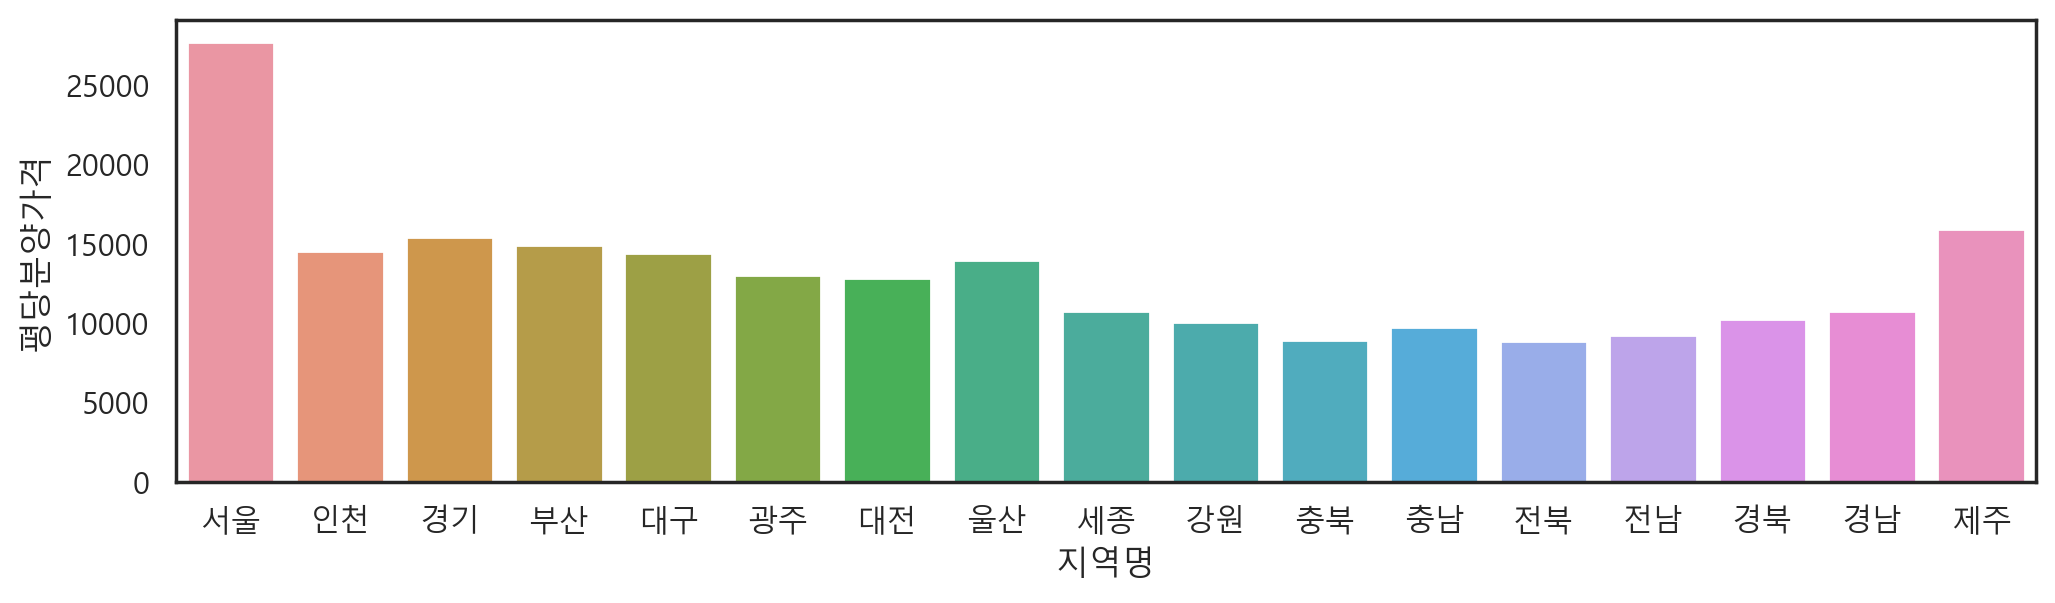

In [279]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
           errorbar=None, # sd: 표준편차, 기본값은 95% 신뢰구간
           )

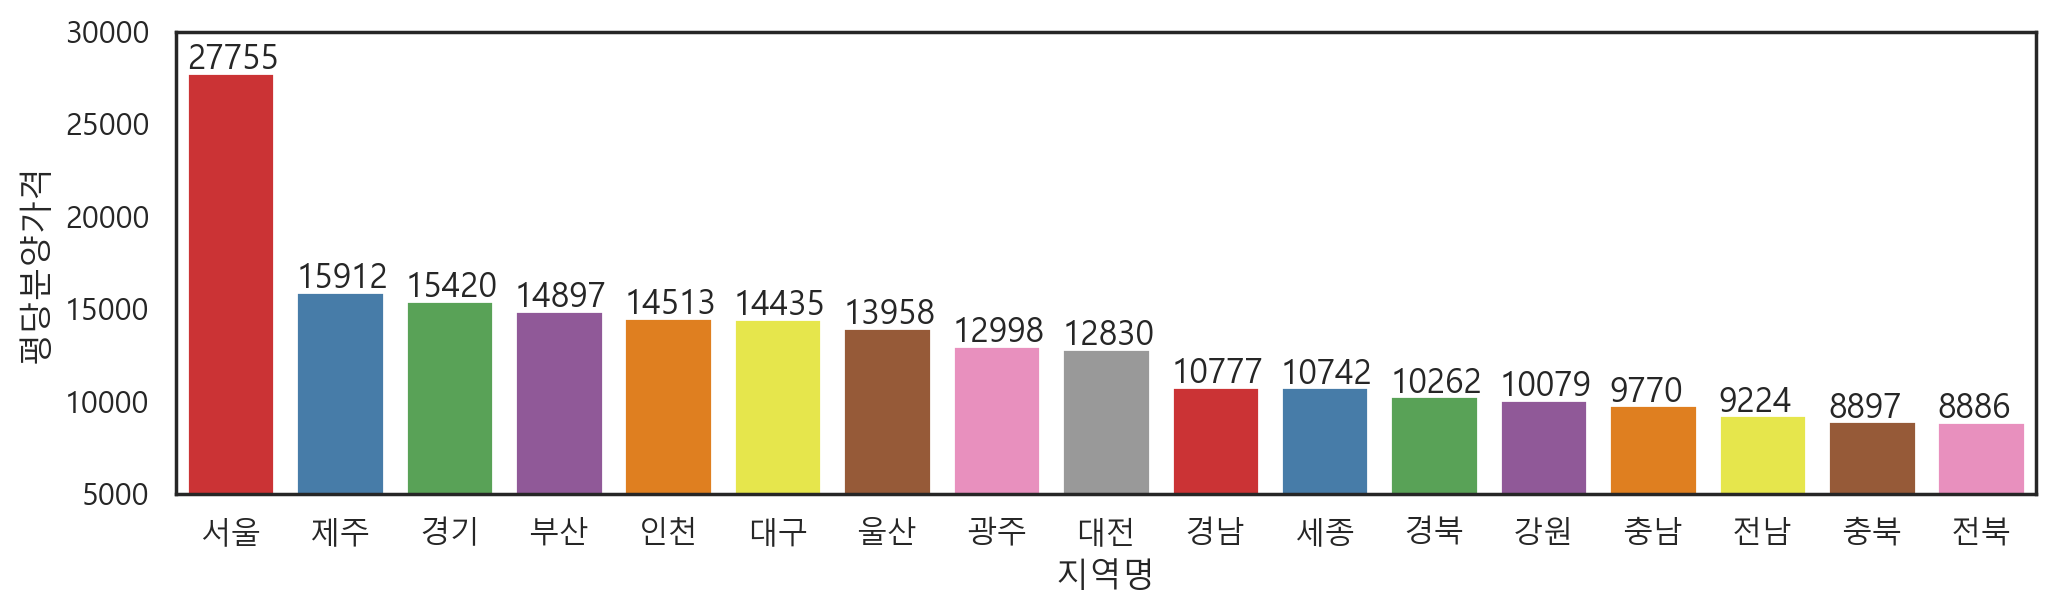

In [288]:
# 위 barplot + sort + 값 annot
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
result.index
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
           order = result.index,
           errorbar=None,
           palette='Set1')
for idx, val in enumerate(result):
    plt.text(idx-0.4, val+200, round(val))
plt.ylim([5000, 30000])
plt.show()

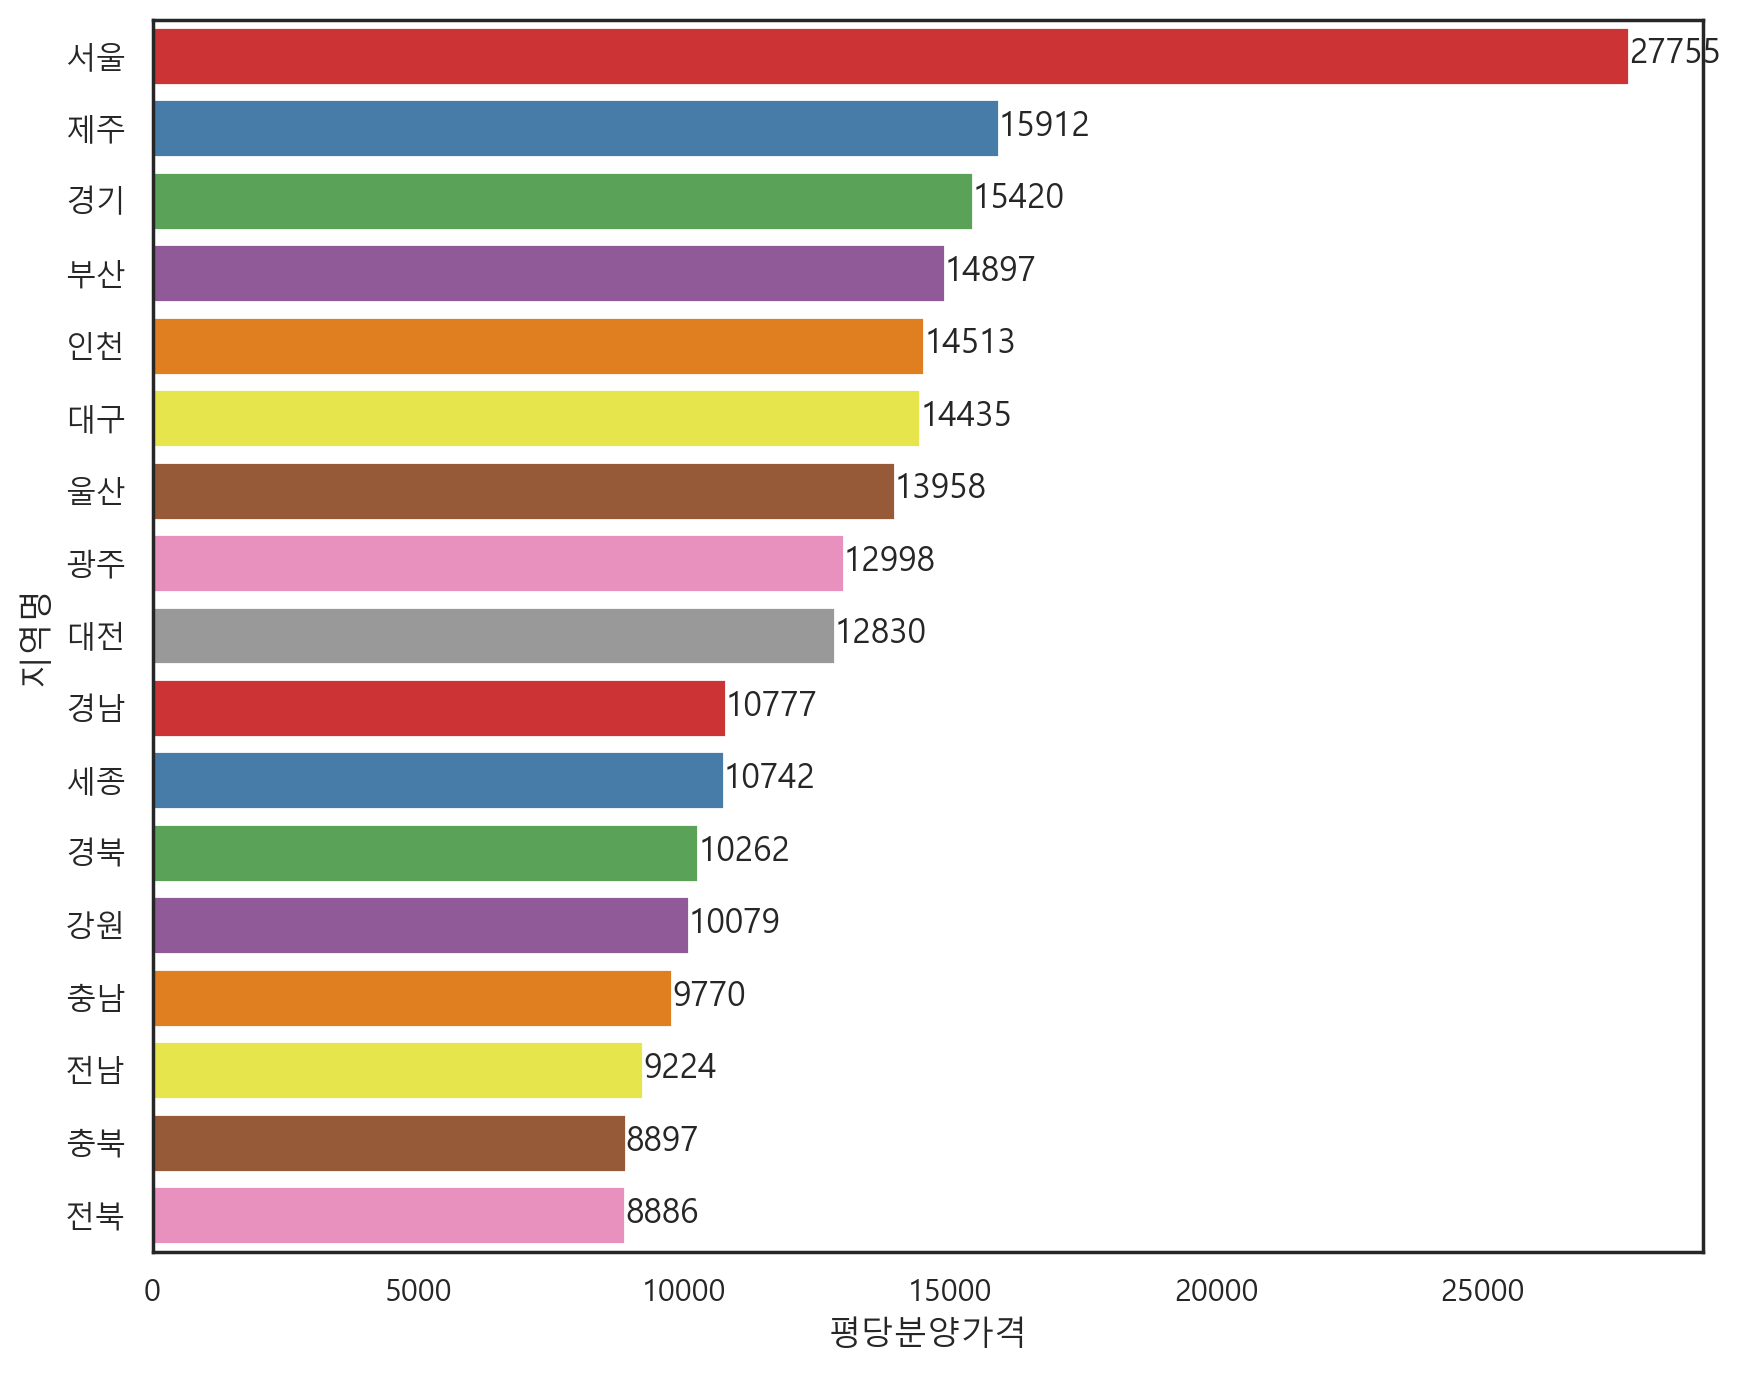

In [295]:
# 가로 barplot
plt.figure(figsize=(10,8))
sns.barplot(data=df_last, y='지역명', x='평당분양가격',
           order = result.index,
           errorbar=None,
           palette='Set1')
for idx, val in enumerate(result):
    plt.text(val, idx+0.1, round(val))
plt.show()

## (2) 연도별 평당분양가격

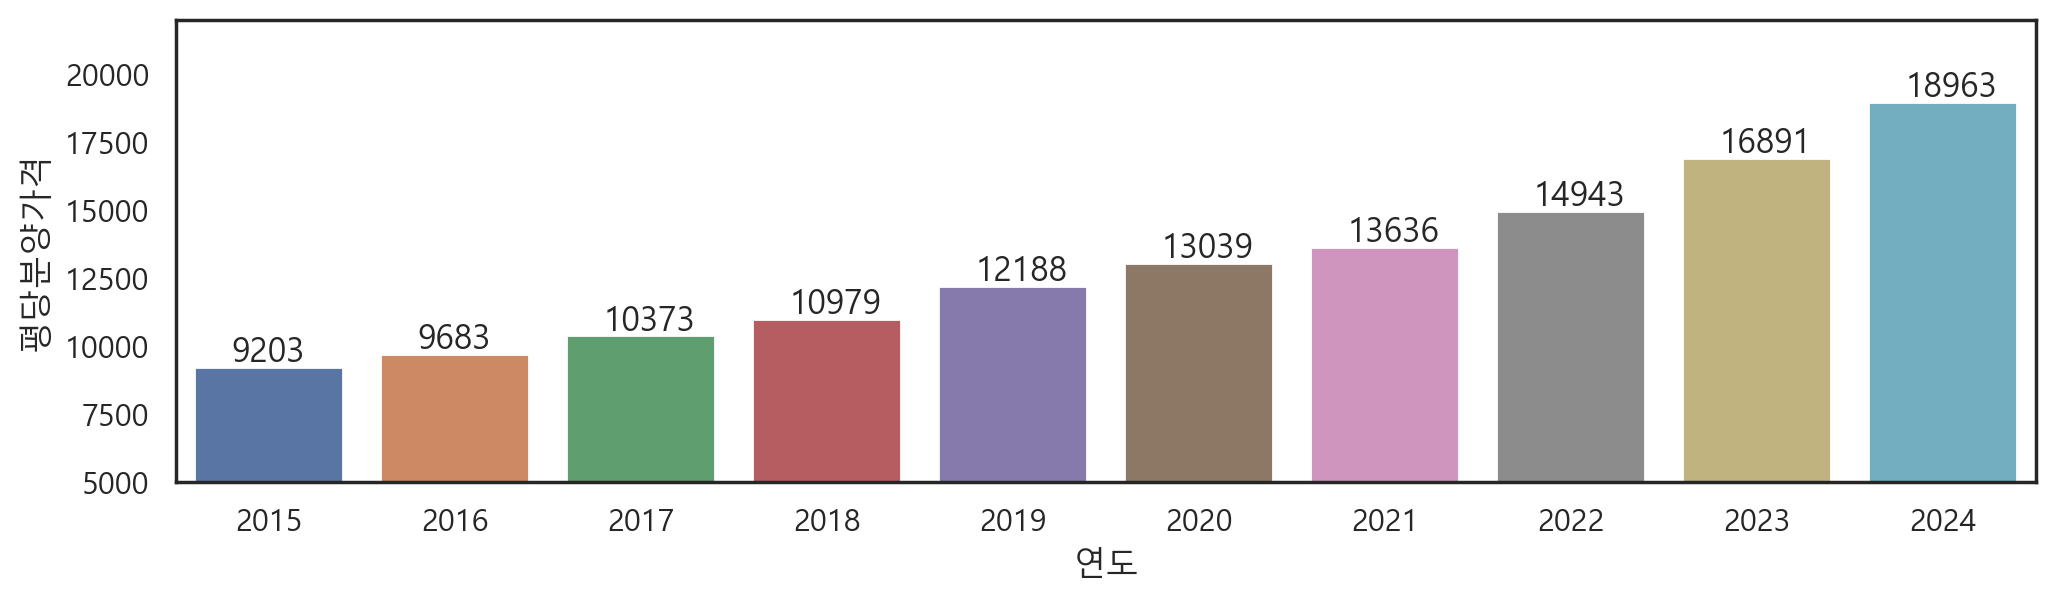

In [304]:
sns.barplot(data=df_last, x='연도', y='평당분양가격', errorbar=None)

result = df_last.groupby('연도')['평당분양가격'].mean()
for idx, val in enumerate(result):
    plt.text(idx-0.2, val+200, round(val))
plt.ylim([5000, 22000])
plt.show()

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

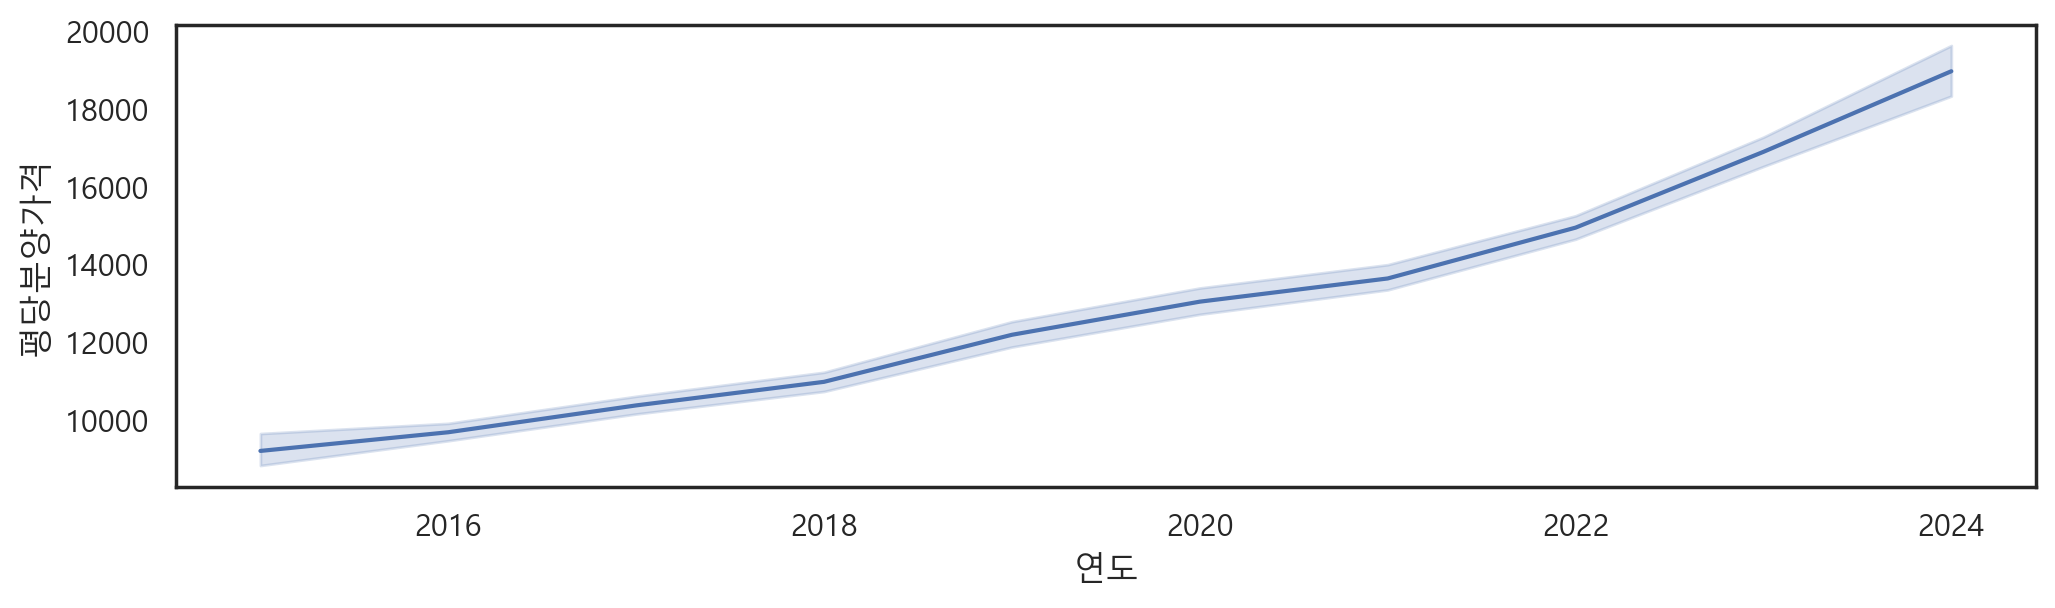

In [317]:
# 년도별 평당분양가격의 추이 (lineplot)
sns.lineplot(data=df_last, x='연도', y='평당분양가격')

# result = df_last.groupby('연도')['평당분양가격'].mean()
# for idx, val in enumerate(result):
#     plt.text(idx-0.2, val+200, round(val))
# plt.ylim([5000, 22000])
# plt.show()

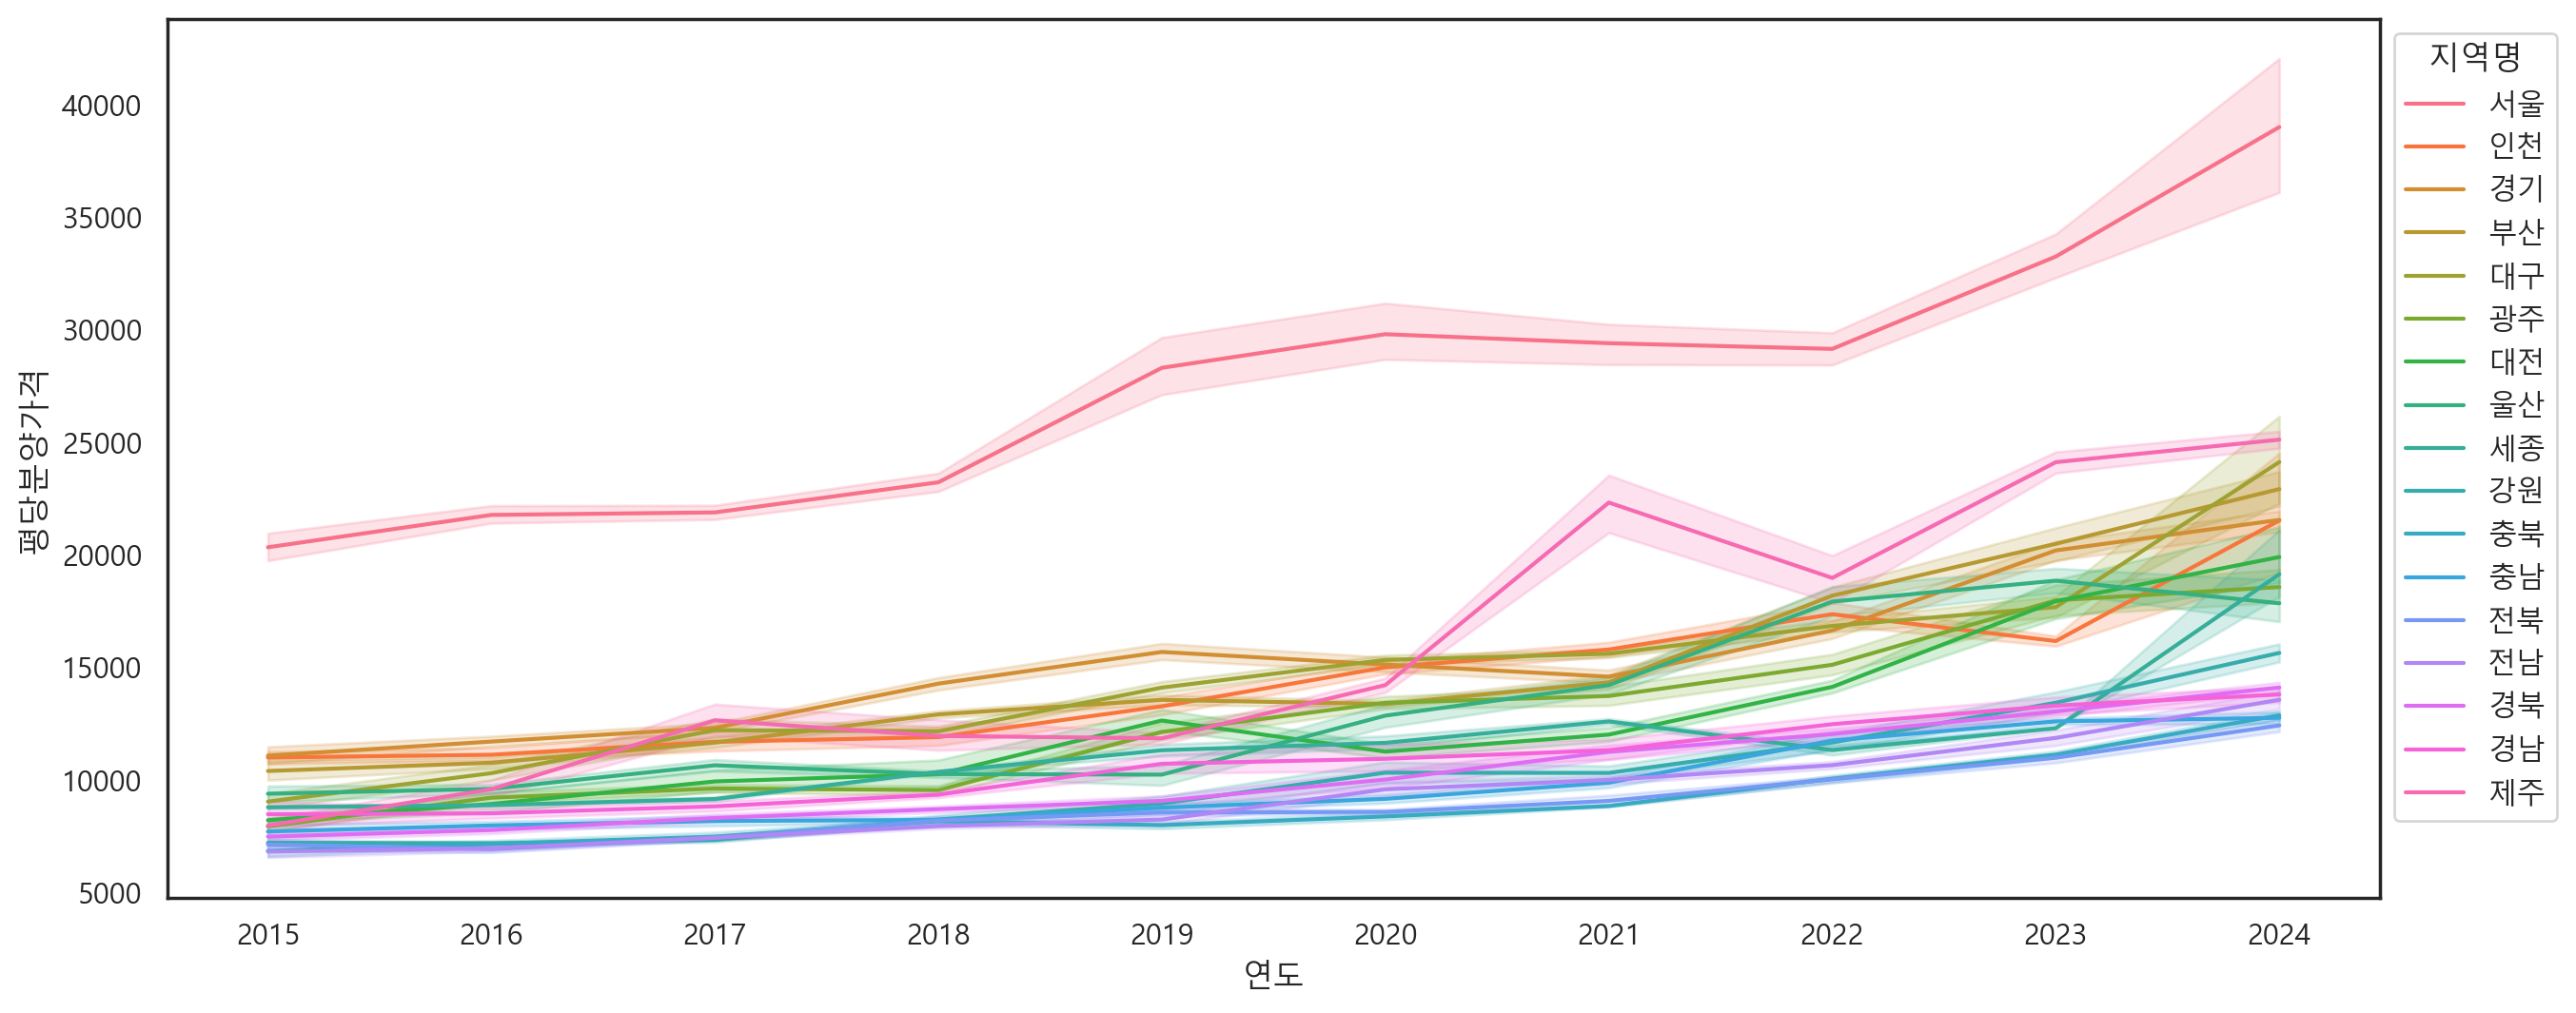

In [310]:
# 년도별 평당분양가격의 추이 (lineplot) - 지역별
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(range(2015,2025))
plt.show()

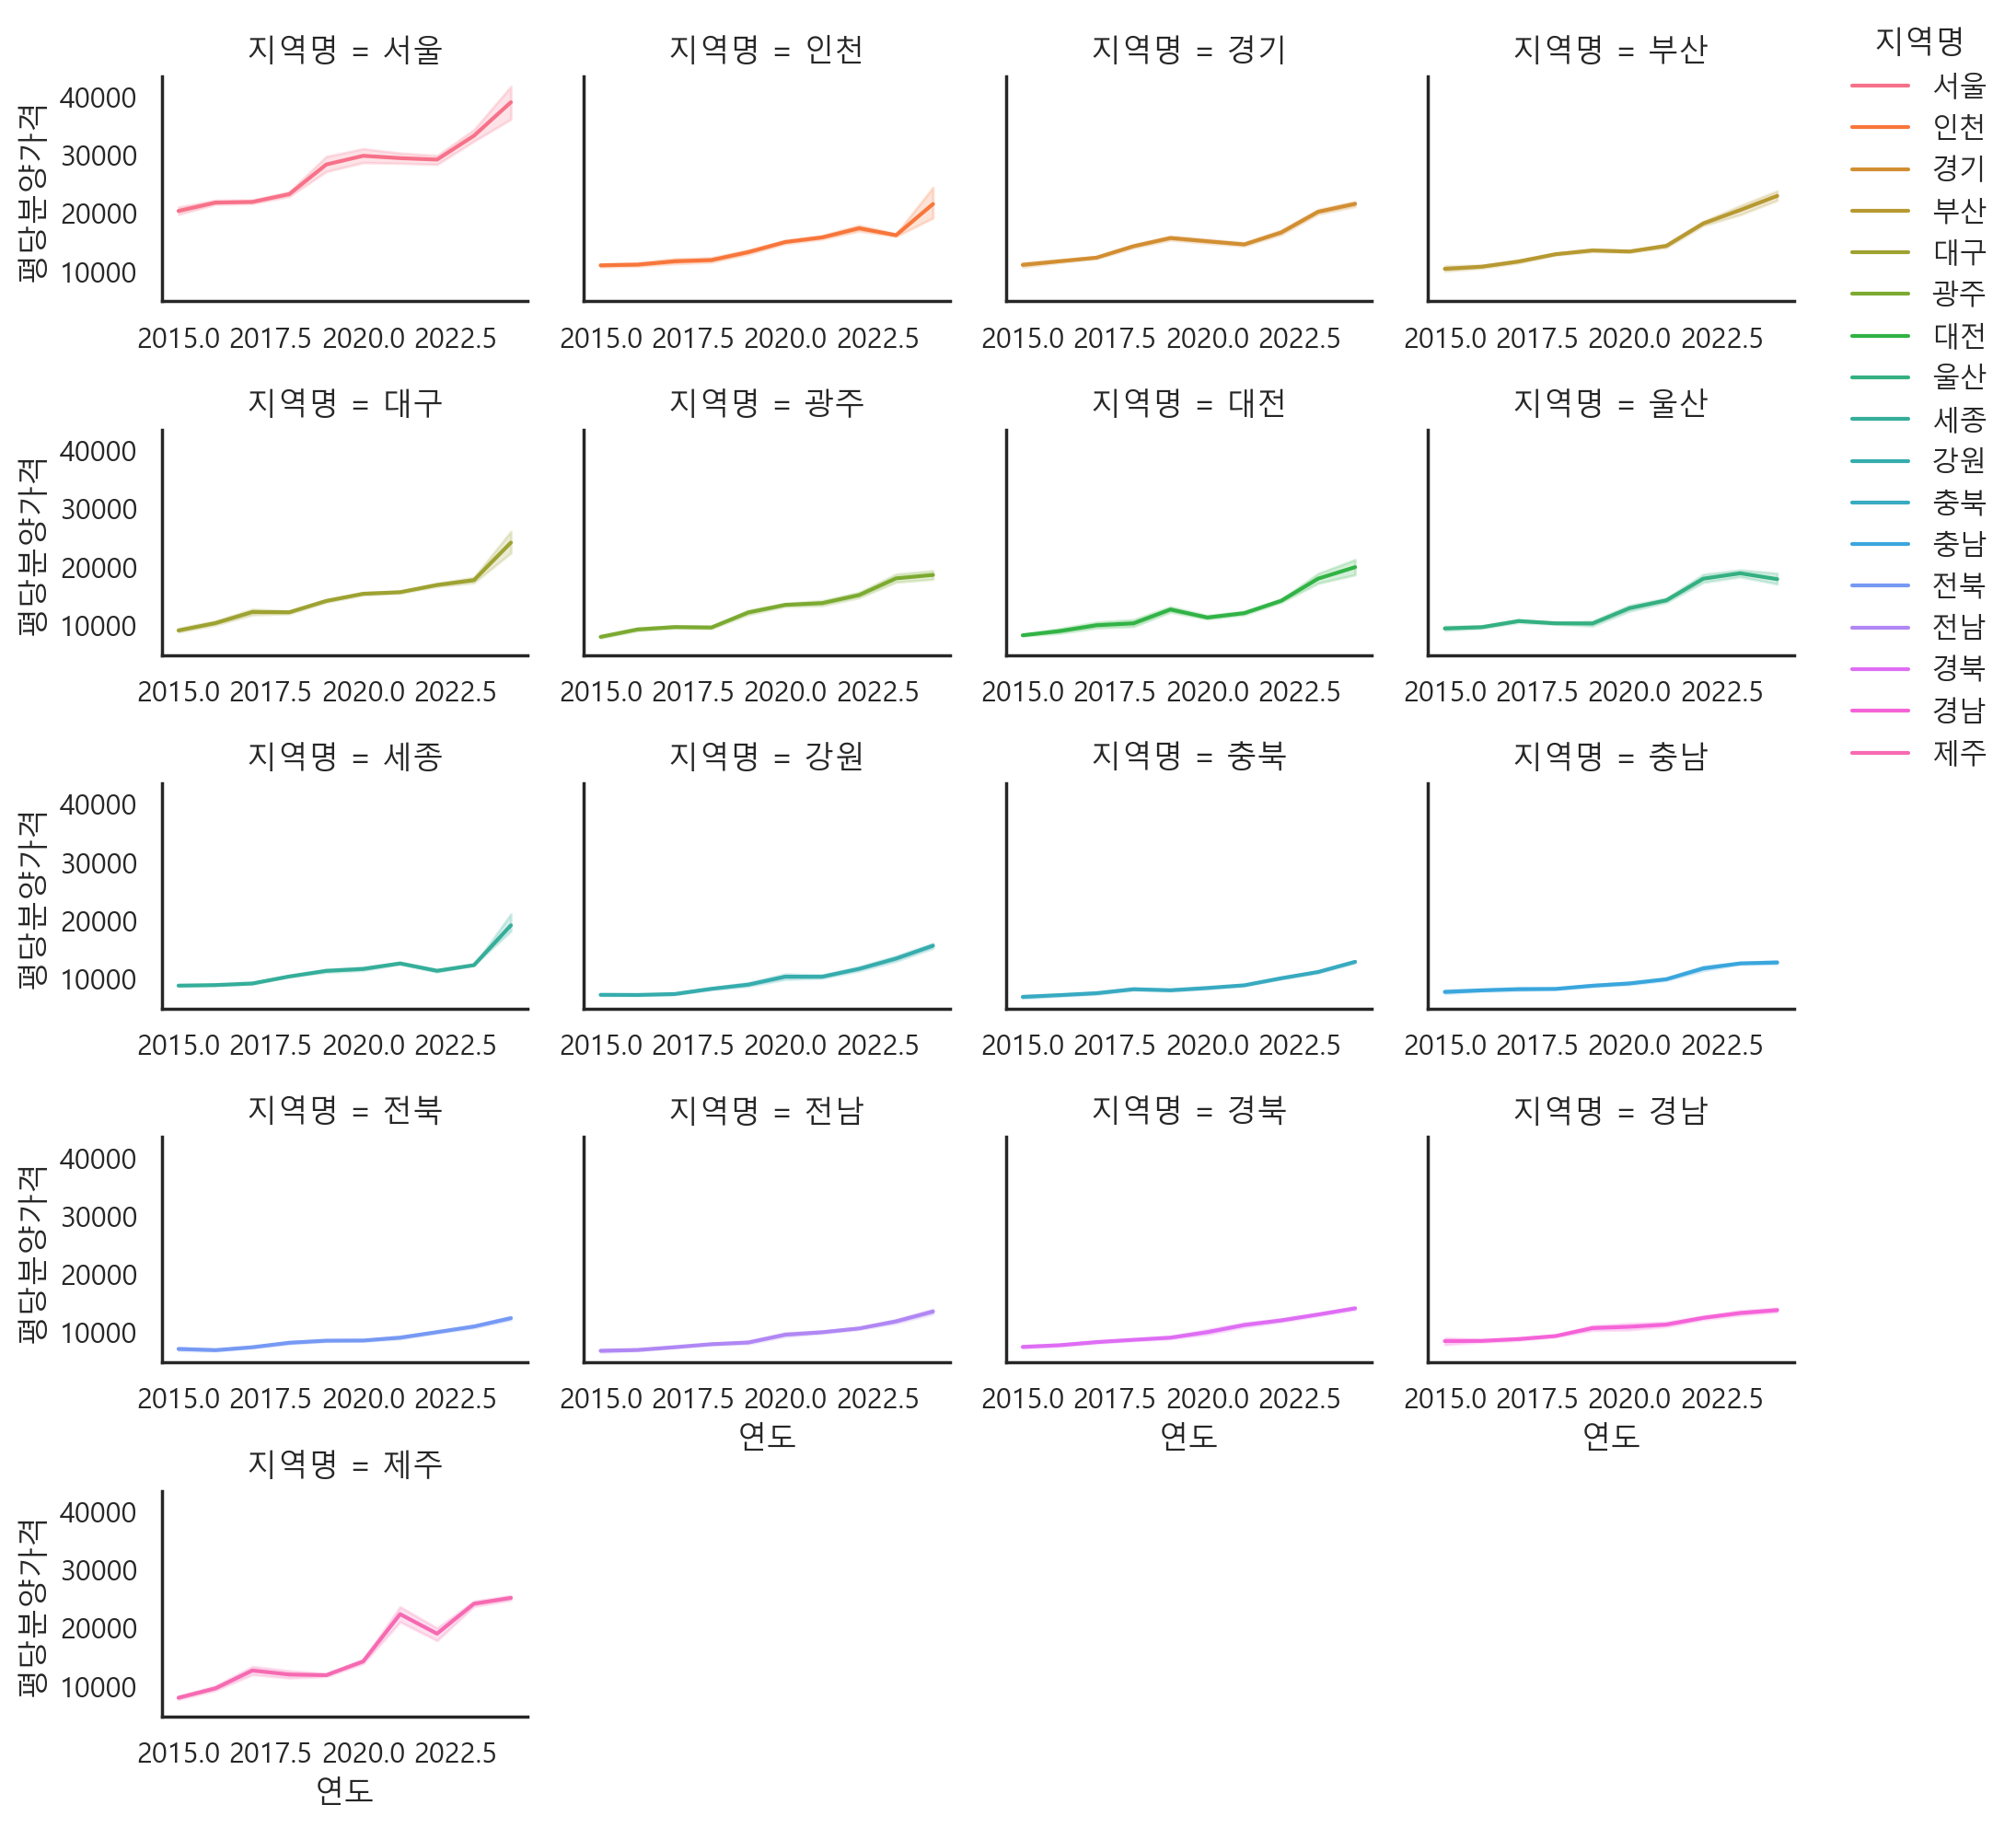

In [315]:
# 년도별 평당분양가격의 추이 (lineplot) - 지역별 서브플롯
g = sns.relplot(data=df_last, x='연도', y='평당분양가격',
           hue='지역명',
           kind='line',
           col='지역명',
           col_wrap=4,
           facet_kws={'sharex':False, 'sharey':True}
           )
g.fig.set_size_inches(10,10) # 서브플롯 사이즈 조정
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout() # 서브플롯 레이아웃 타이트하게 조정

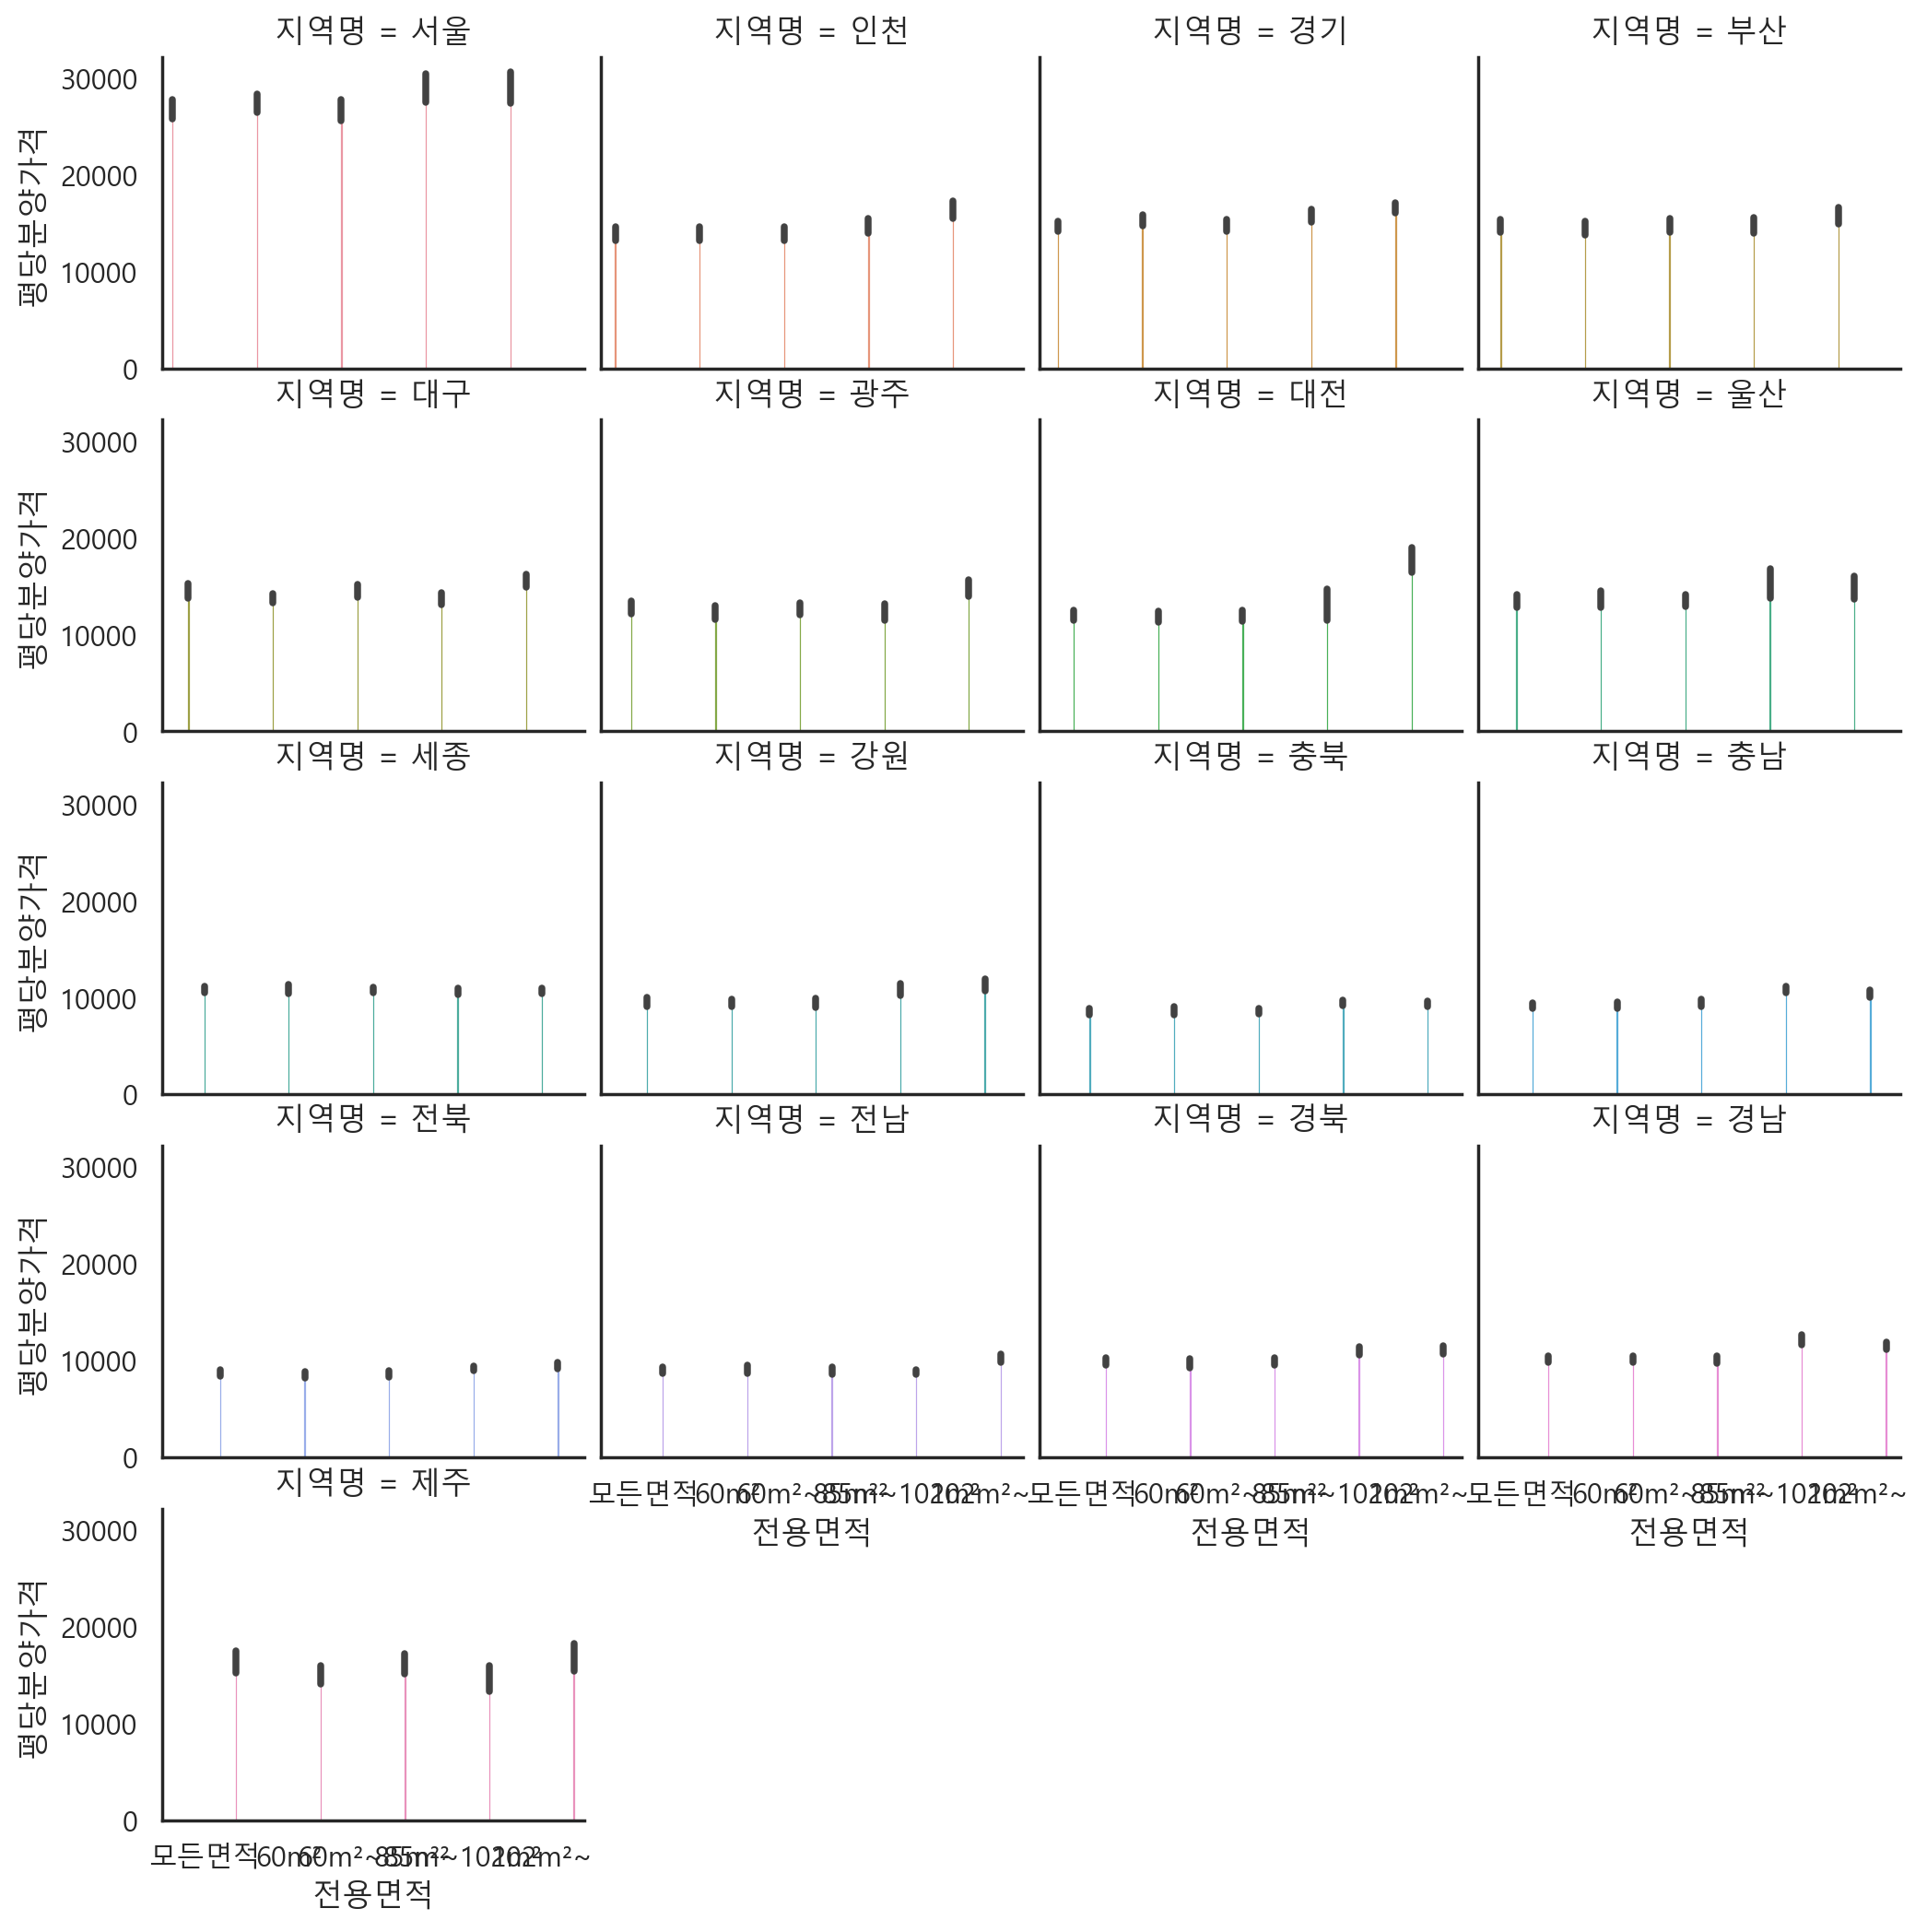

In [320]:
# 년도별 평당분양가격의 추이 (lineplot) - 지역별 서브플롯
g = sns.catplot(data=df_last, x='전용면적', y='평당분양가격',
           hue='지역명',
           kind='bar',
           col='지역명',
           col_wrap=4,
           # facet_kws={'sharex':False, 'sharey':True}
           )
g.fig.set_size_inches(10,10) # 서브플롯 사이즈 조정
#sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout() # 서브플롯 레이아웃 타이트하게 조정

<Axes: xlabel='연도', ylabel='평당분양가격'>

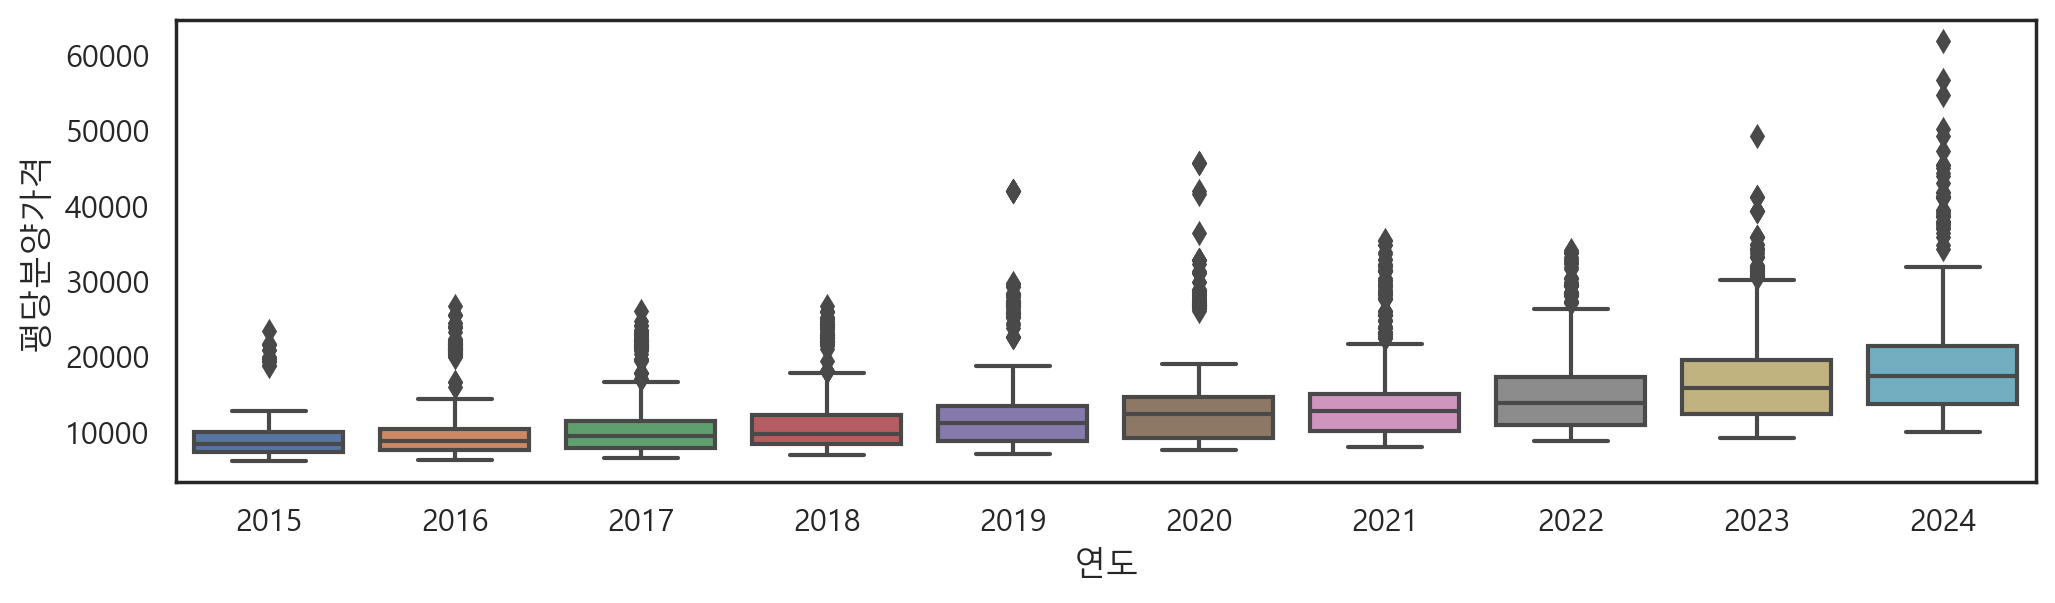

In [321]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

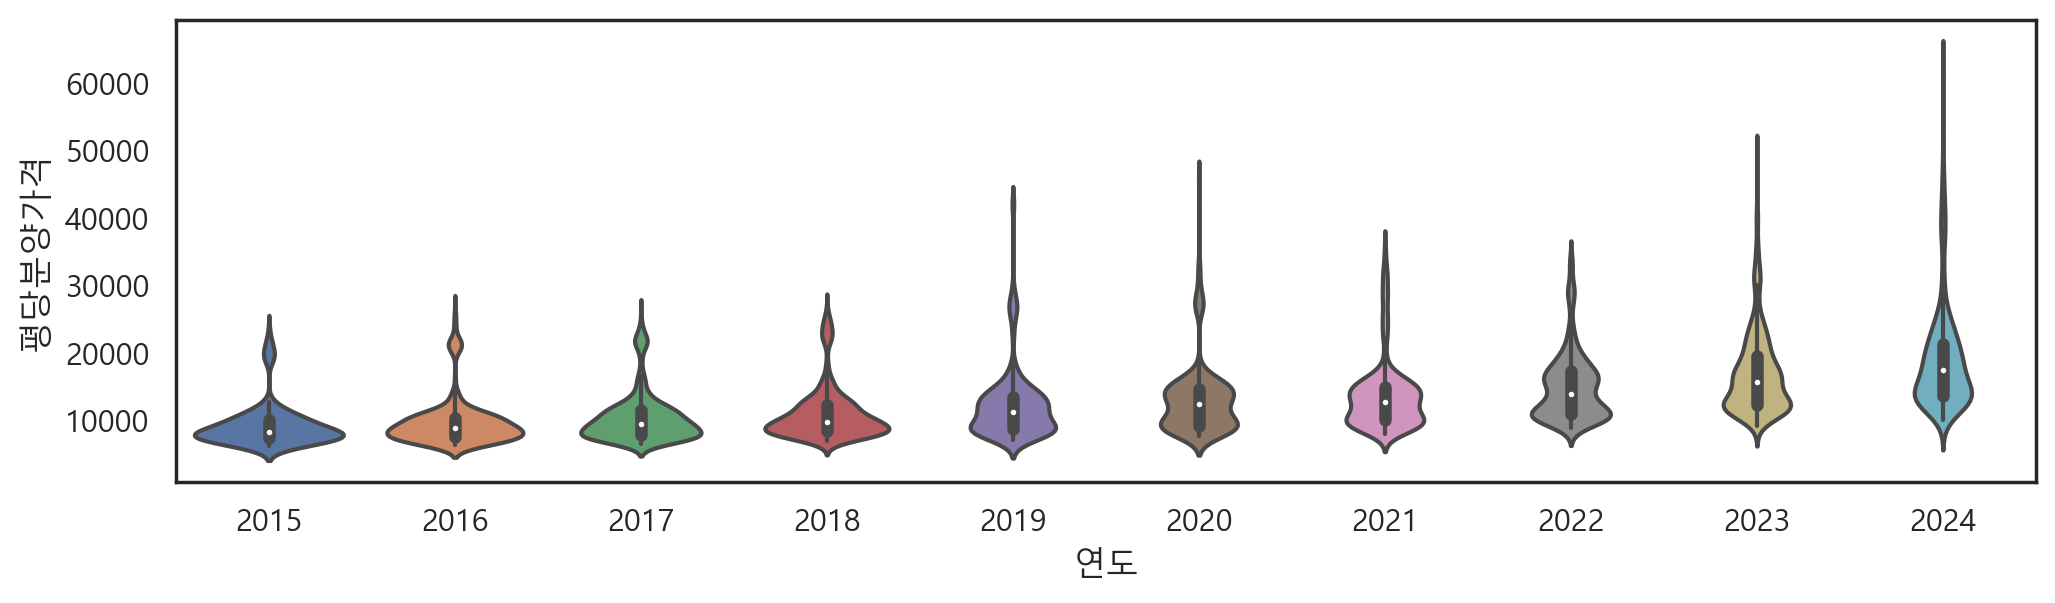

In [324]:

sns.violinplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

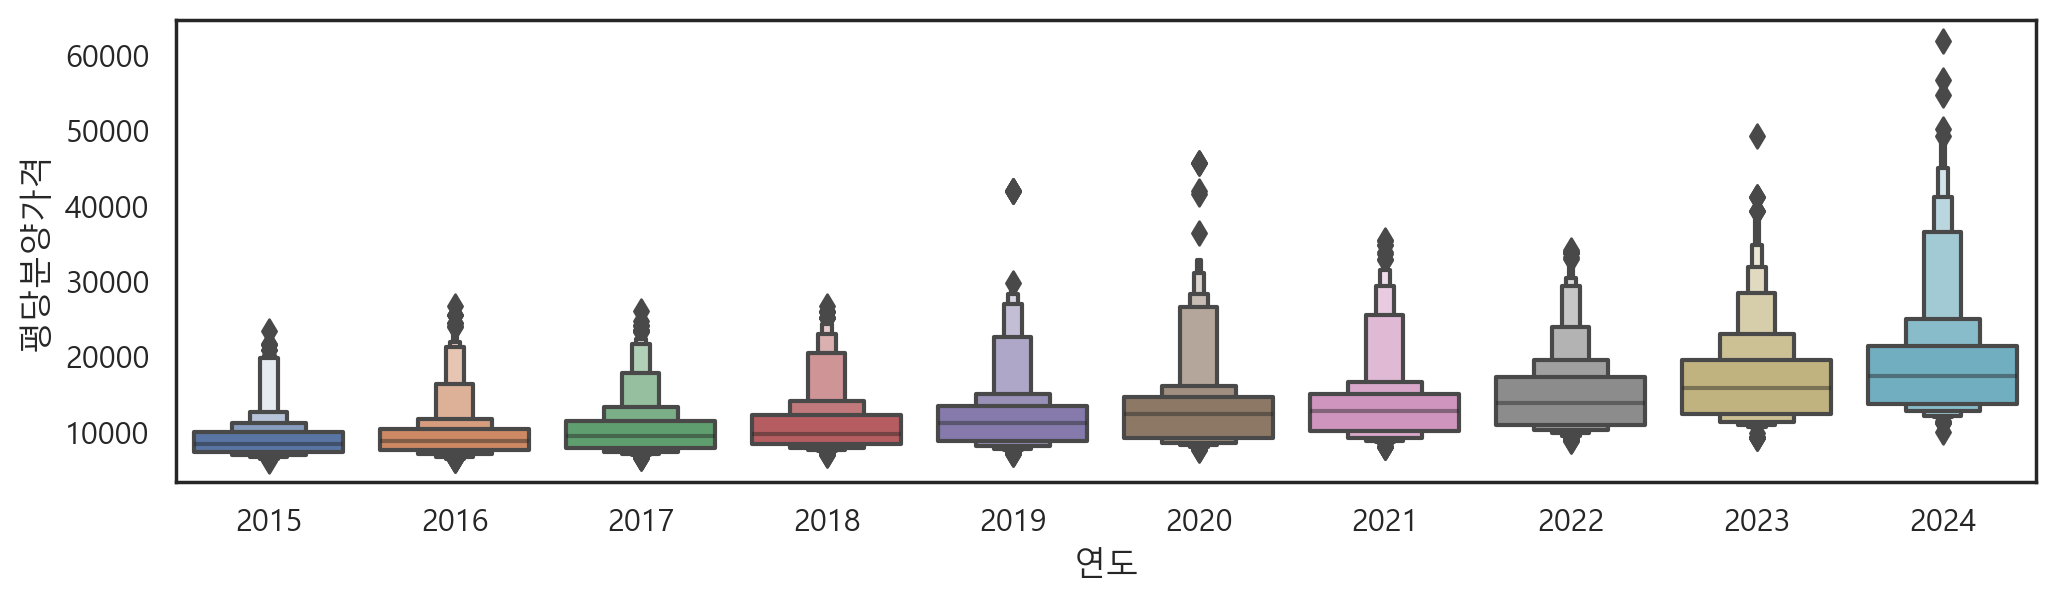

In [325]:
sns.boxenplot(data=df_last, x='연도', y='평당분양가격')

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
